## Machine Learning aplicado al estudio de datos criminales

### Importamos las librerias necesarias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

### Cargamos los datos en un DataFrame de Pandas (Python)

In [5]:
df = pd.read_csv('csv/denuncias_delitos_con_errores.csv')

#### Comenzamos la impieza de los datos, eliminando los que nos afectan estructuralmente y normalizando aquellos que, solo en contexto, generan un problema

In [6]:
df = df.dropna(subset=['cantidad_denuncias'])
df['cantidad_denuncias'] = pd.to_numeric(df['cantidad_denuncias'], errors='coerce').fillna(0).astype(int)

In [7]:
df = df.dropna(subset=['fecha'])

In [8]:
df.loc[df['tipo_delito'].isnull() | (df['tipo_delito'] == 'error'), 'tipo_delito'] = 'N/A'

In [9]:
df.loc[df['ubicacion'].isnull() | (df['ubicacion'] == 'error'), 'ubicacion'] = 'N/A'

In [10]:
df['edad_victima'] = pd.to_numeric(df['edad_victima'], errors='coerce').fillna(0).astype(int)

In [11]:
df.loc[df['genero_victima'].isnull() | ~df['genero_victima'].isin(['F', 'M']), 'genero_victima'] = 'N/A'

In [12]:
df.rename(columns={'hora_dia': 'horario_dia'}, inplace=True)
df.loc[df['horario_dia'].isnull() | ~df['horario_dia'].isin(['mañana', 'tarde', 'noche', 'madrugada']), 'horario_dia'] = 'N/A'

In [13]:
df.loc[df['dia_semana'].isnull() | ~df['dia_semana'].isin(['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']), 'dia_semana'] = 'N/A'

In [14]:
df['mes'] = pd.to_numeric(df['mes'], errors='coerce').fillna(0).astype(int)

In [15]:
df.rename(columns={'año': 'anio'}, inplace=True)
df['anio'] = pd.to_numeric(df['anio'], errors='coerce').fillna(0).astype(int)

In [16]:
df.to_csv('csv/denuncias_delitos_normalizado.csv', index=False)

#### Graficamos los datos para tener un mejor entendimiento de los datos y visualizar posibles errores que no corregimos

['lesiones graves' 'robo de vehículo' 'robo piraña' 'robo' 'hurto'
 'robo a mano armada' 'vandalismo' 'lesiones leves']


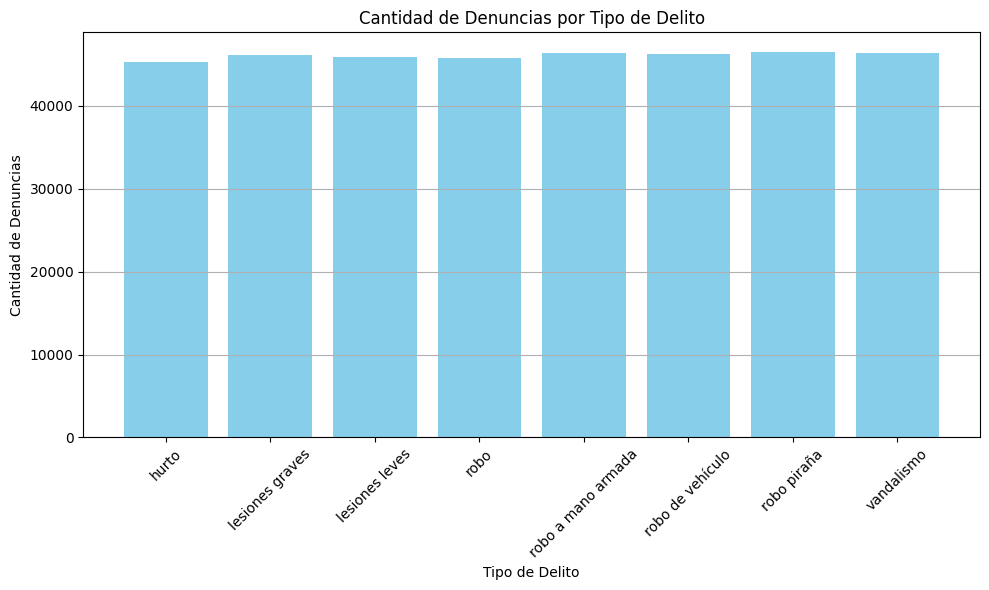

In [17]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[df['tipo_delito'] != 'N/A'].dropna()
tipos_de_delito = df['tipo_delito'].unique()
print(tipos_de_delito)

df_plot = df.groupby('tipo_delito')['cantidad_denuncias'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_plot['tipo_delito'], df_plot['cantidad_denuncias'], color='skyblue')
plt.xlabel('Tipo de Delito')
plt.ylabel('Cantidad de Denuncias')
plt.title('Cantidad de Denuncias por Tipo de Delito')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

['lesiones graves' 'robo' 'lesiones leves' 'robo de vehículo' 'vandalismo'
 'robo piraña' 'hurto' 'robo a mano armada']


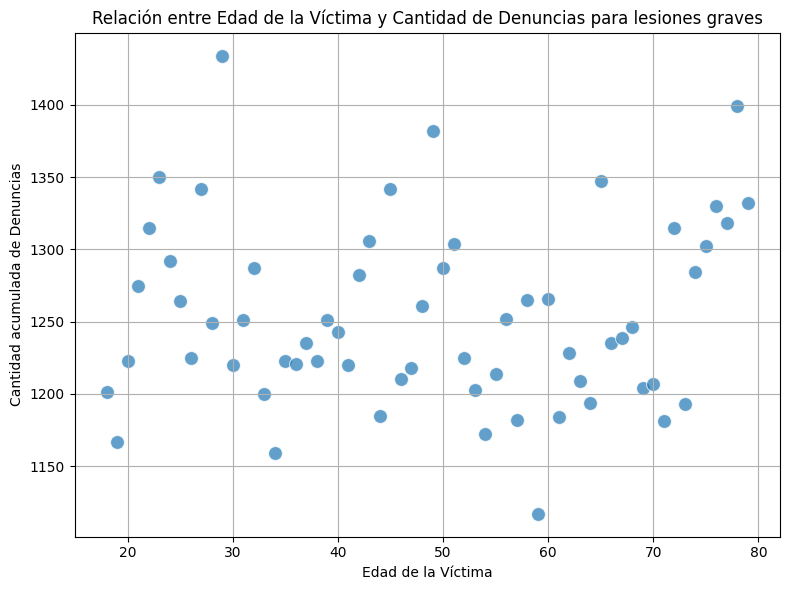

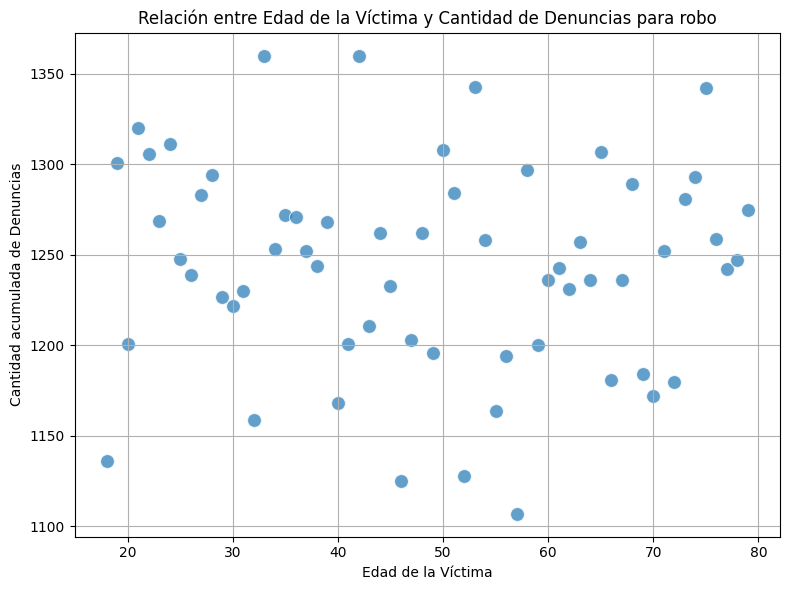

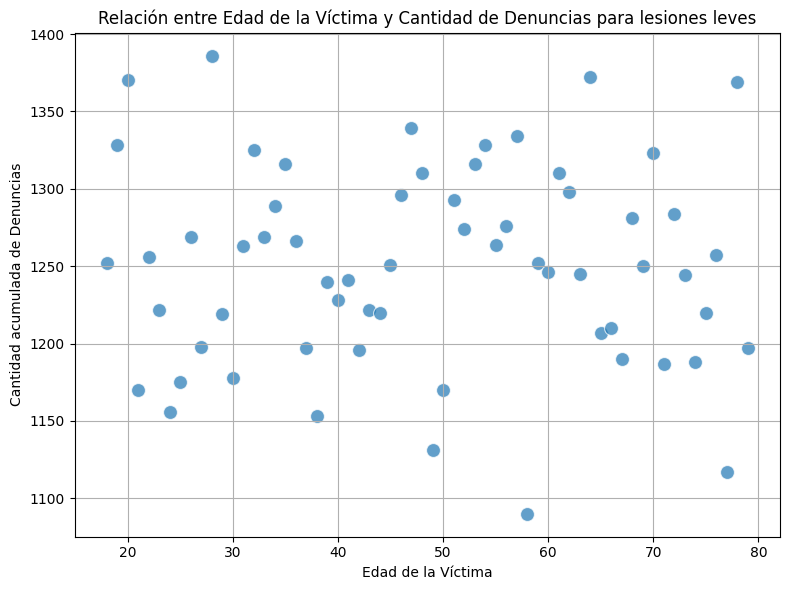

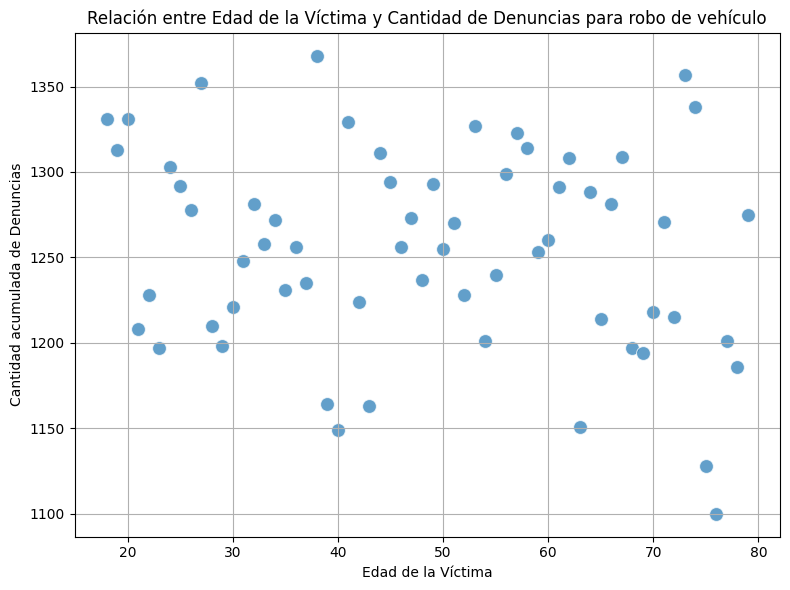

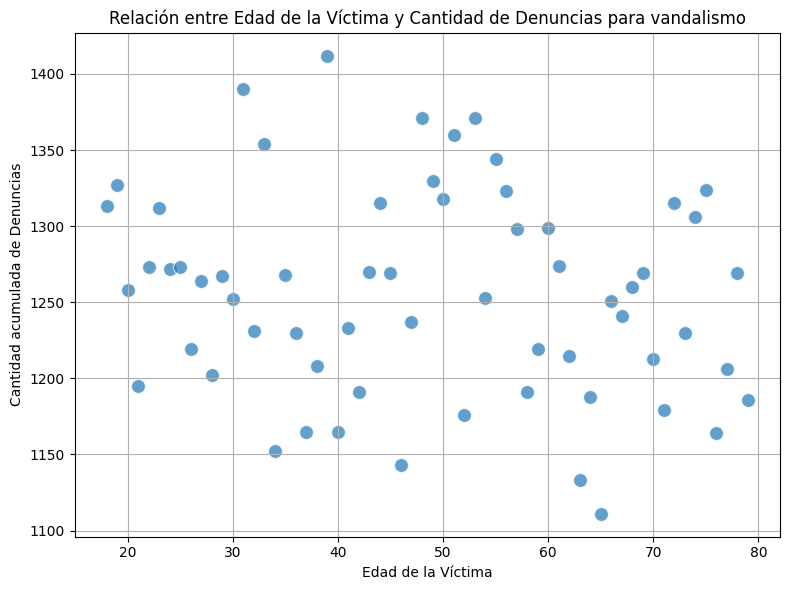

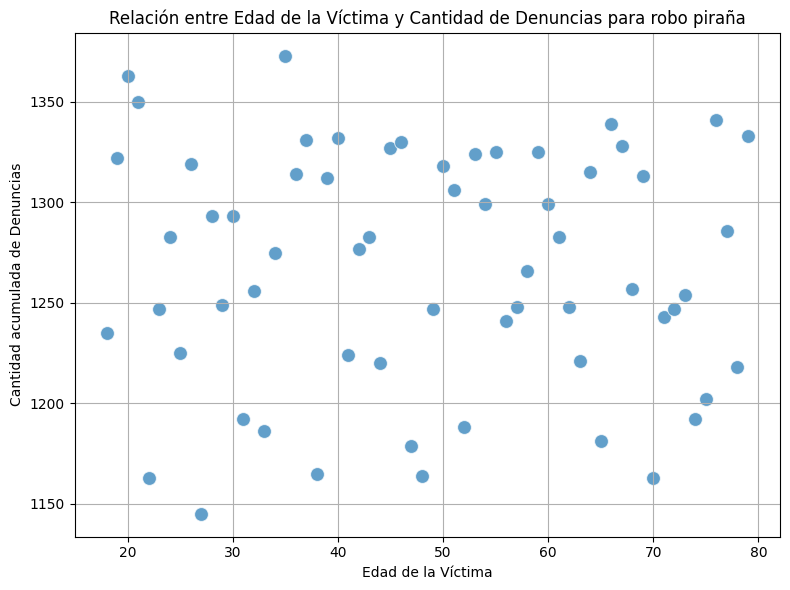

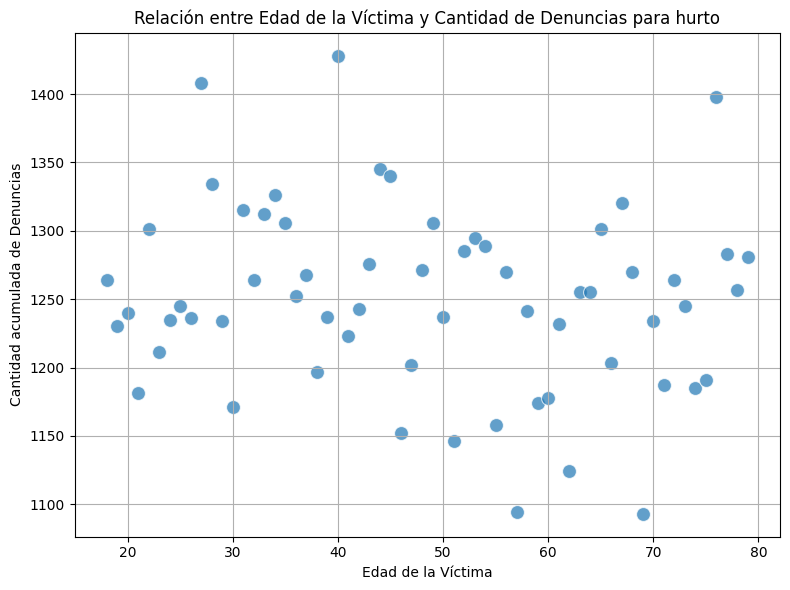

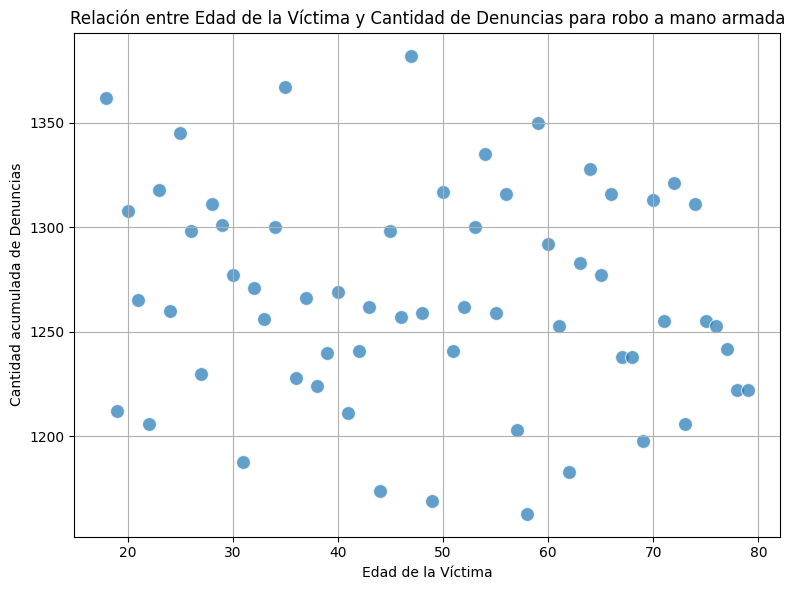

In [18]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[df['tipo_delito'] != 'N/A']
df = df[df['edad_victima'] != 0]
df = df[df['cantidad_denuncias'] != 0]

tipos_de_delito = df['tipo_delito'].dropna().unique()
print(tipos_de_delito)

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(8, 6))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    df_tipo_delito = df_tipo_delito.groupby('edad_victima')['cantidad_denuncias'].sum().reset_index()
    sns.scatterplot(data=df_tipo_delito, x='edad_victima', y='cantidad_denuncias', alpha=0.7, s=100)
    plt.xlabel('Edad de la Víctima')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Edad de la Víctima y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

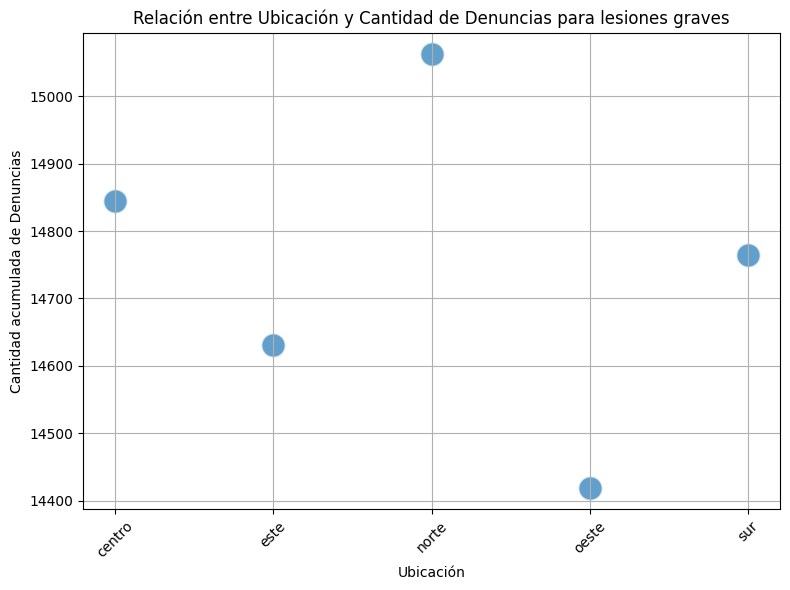

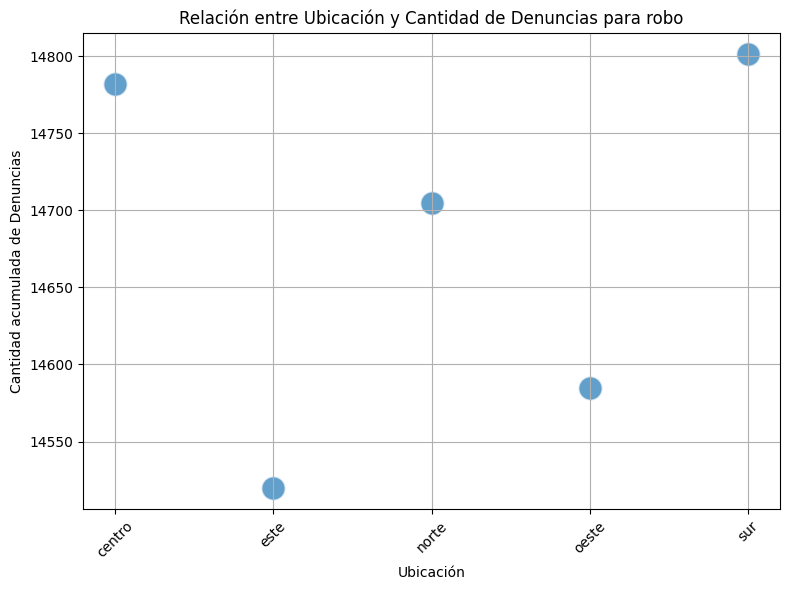

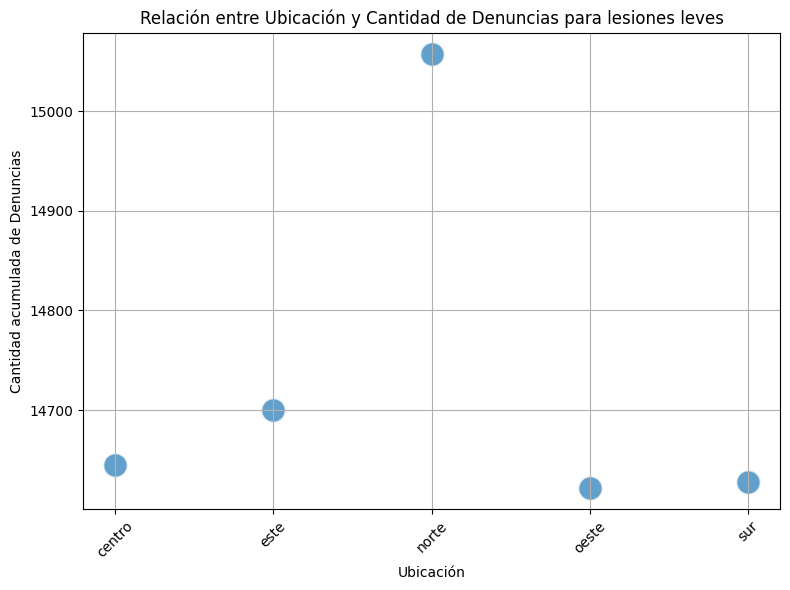

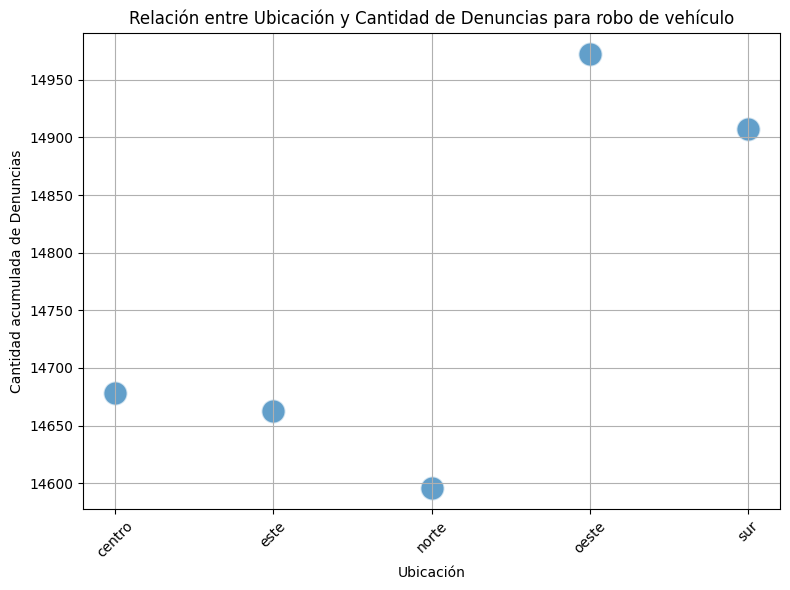

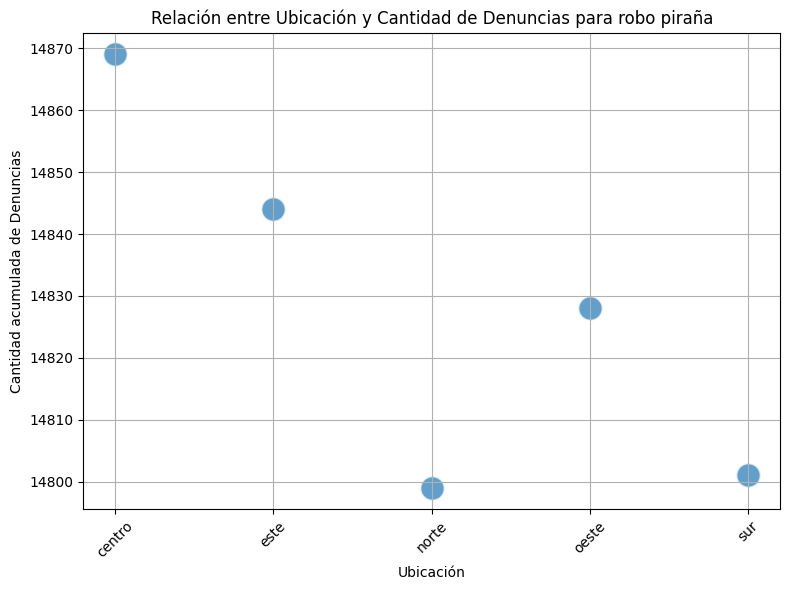

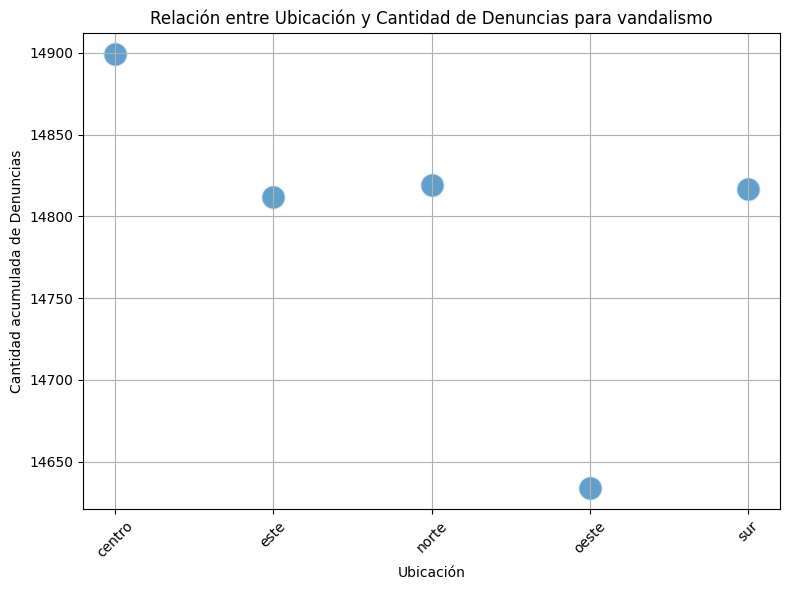

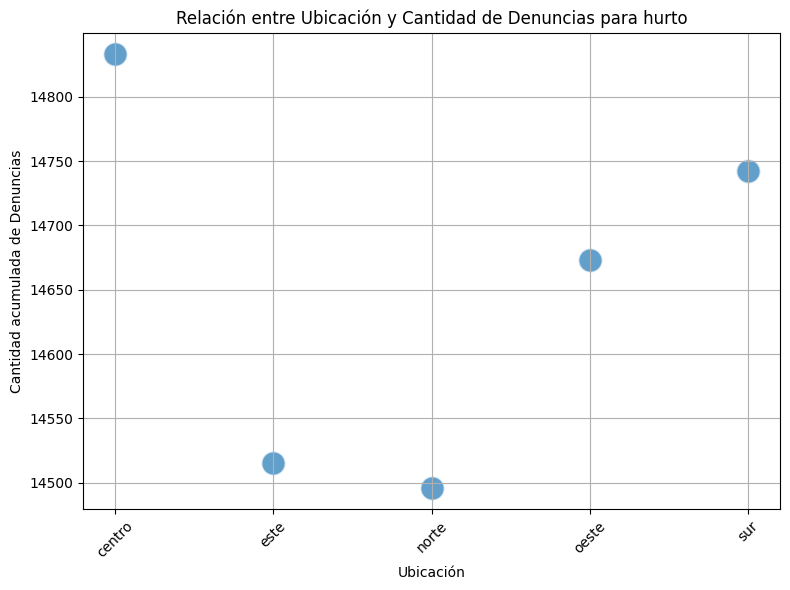

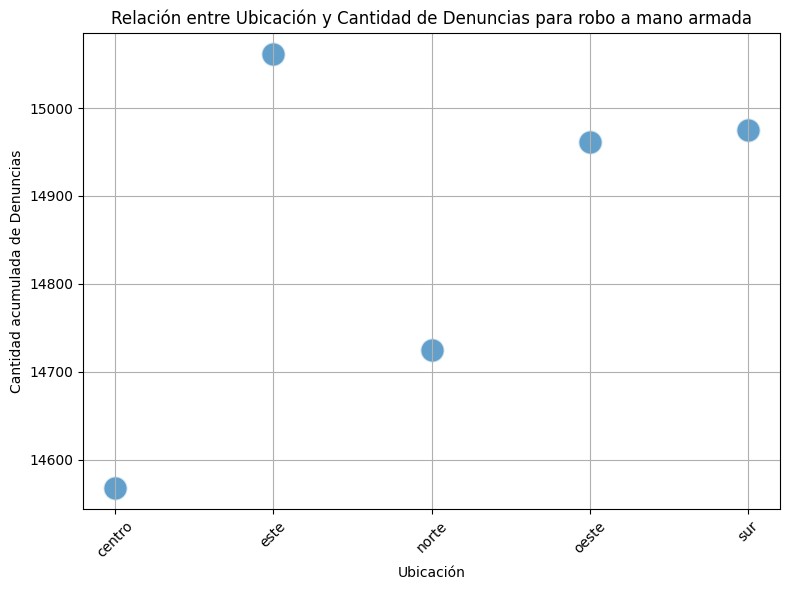

In [19]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[(df['tipo_delito'] != 'N/A') & (df['ubicacion'] != 'N/A') & (df['cantidad_denuncias'] != 0)]

tipos_de_delito = df['tipo_delito'].dropna().unique()

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(8, 6))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    df_tipo_delito = df_tipo_delito.groupby('ubicacion')['cantidad_denuncias'].sum().reset_index()
    sns.scatterplot(data=df_tipo_delito, x='ubicacion', y='cantidad_denuncias', alpha=0.7, s=300)
    plt.xlabel('Ubicación')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Ubicación y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

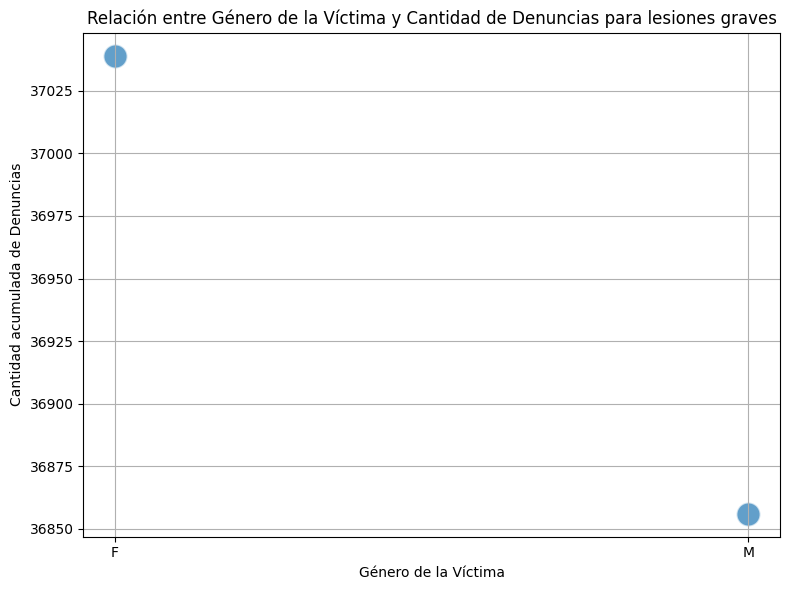

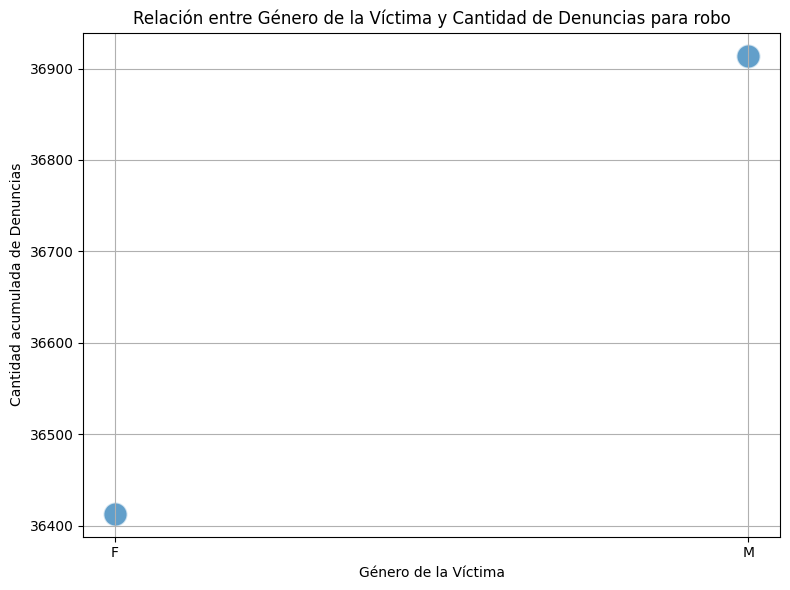

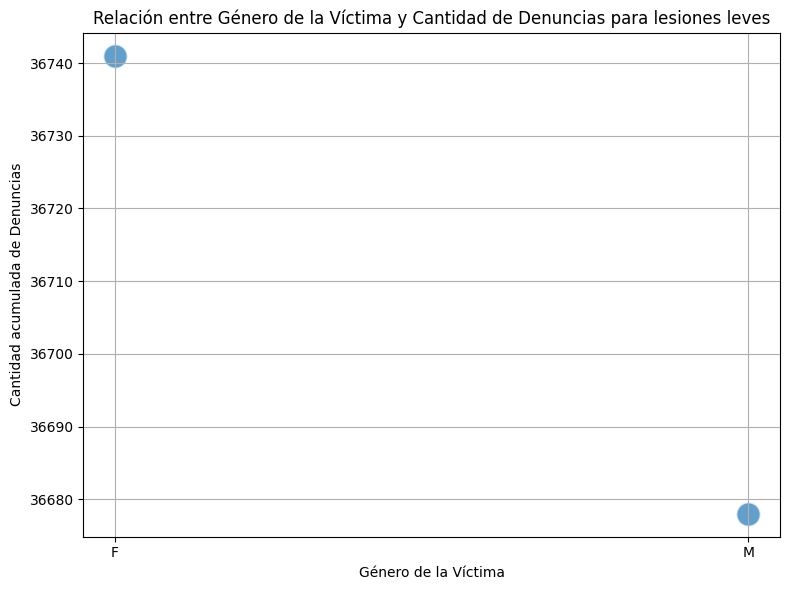

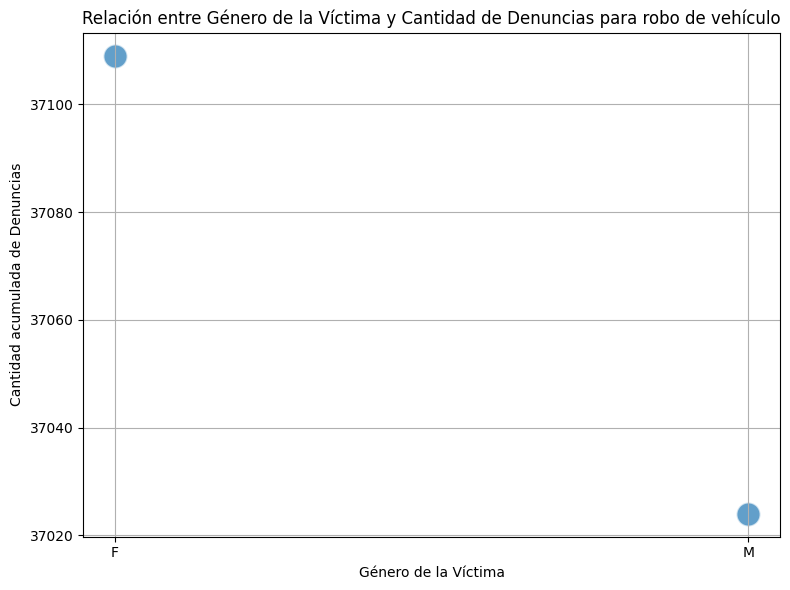

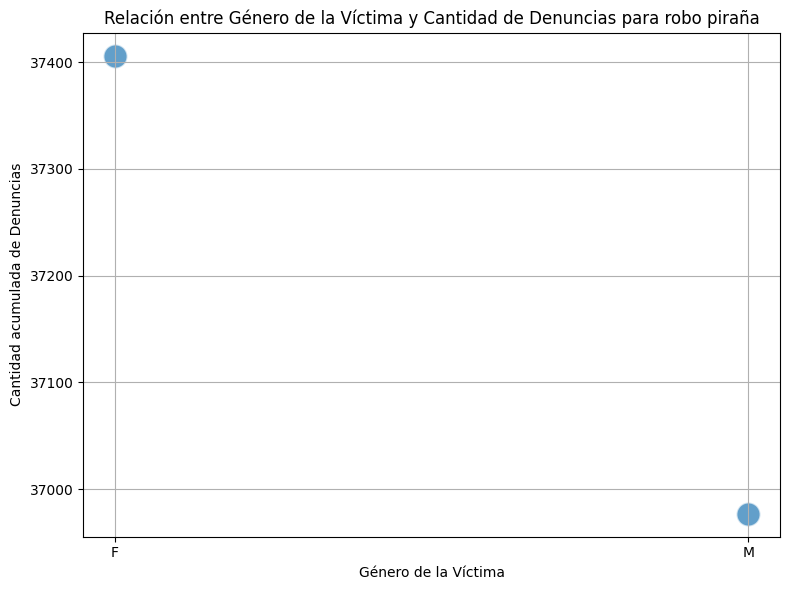

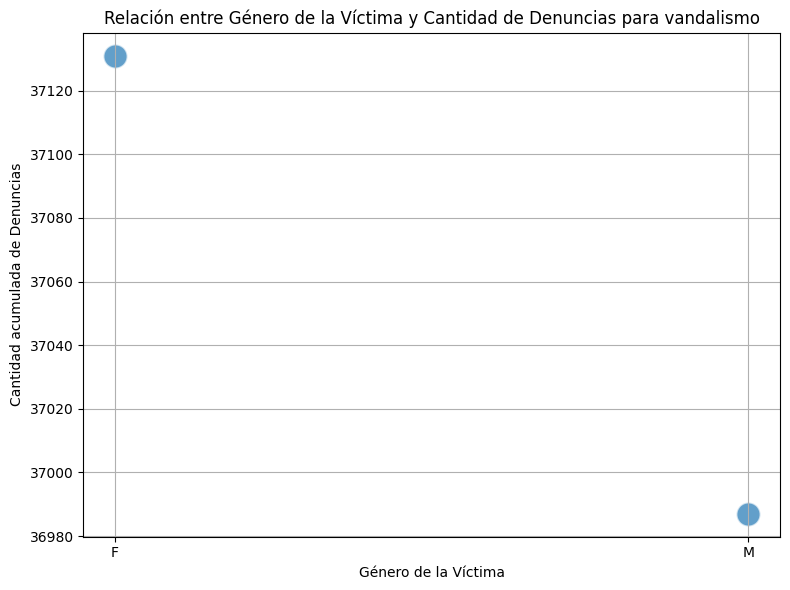

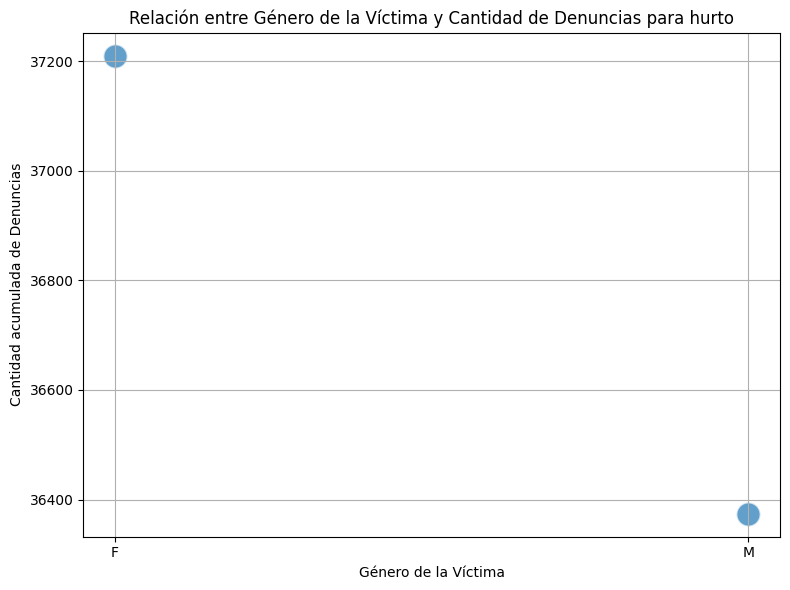

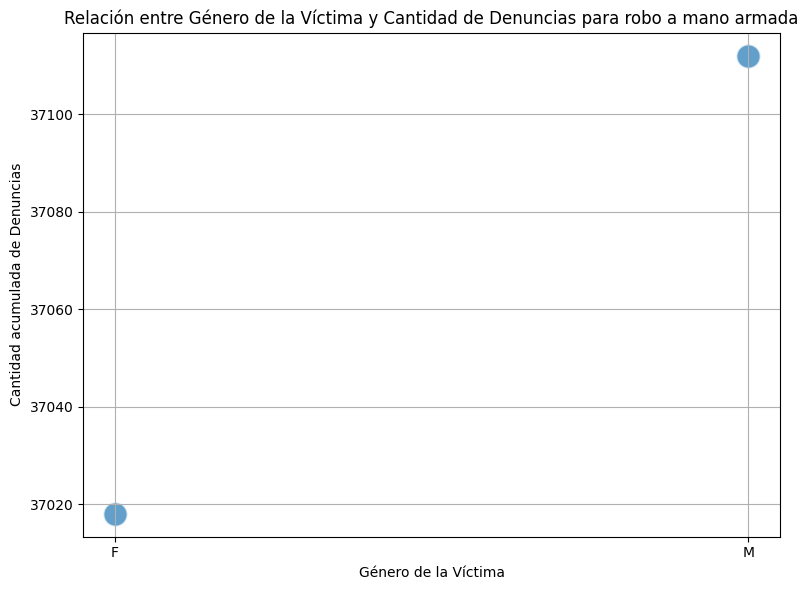

In [20]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[(df['tipo_delito'] != 'N/A') & (df['genero_victima'] != 'N/A') & (df['cantidad_denuncias'] != 0)]

tipos_de_delito = df['tipo_delito'].dropna().unique()

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(8, 6))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    df_tipo_delito = df_tipo_delito.groupby('genero_victima')['cantidad_denuncias'].sum().reset_index()
    sns.scatterplot(data=df_tipo_delito, x='genero_victima', y='cantidad_denuncias', alpha=0.7, s=300)
    plt.xlabel('Género de la Víctima')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Género de la Víctima y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

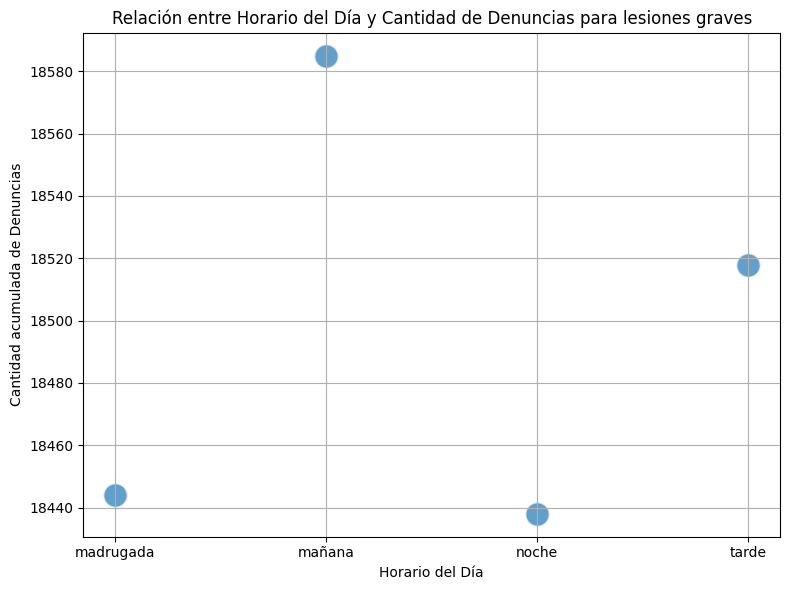

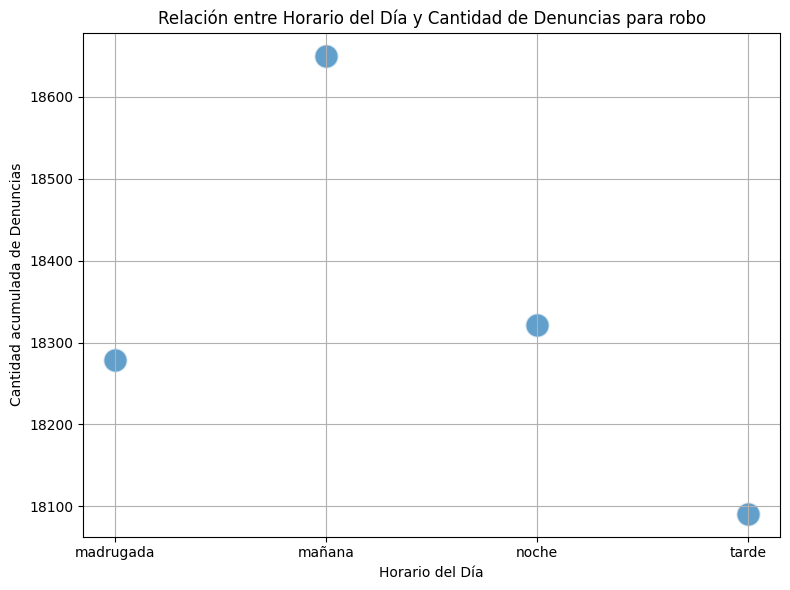

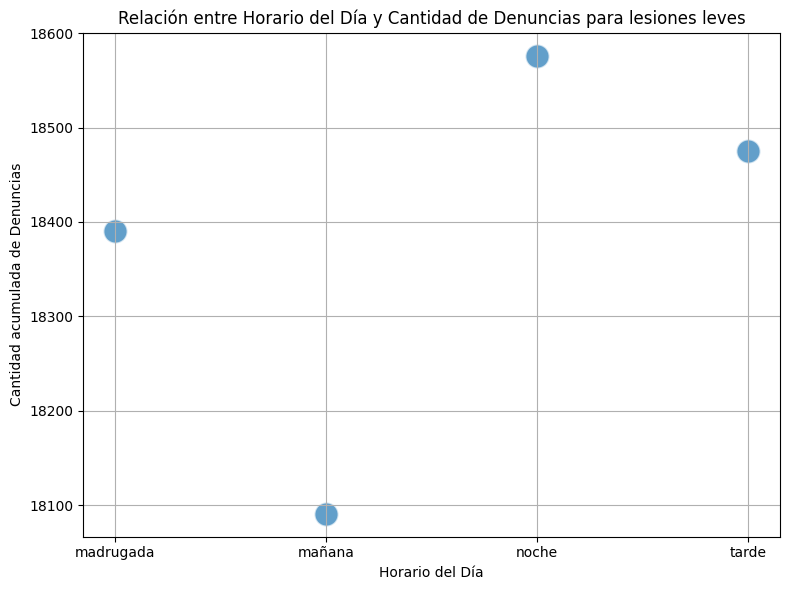

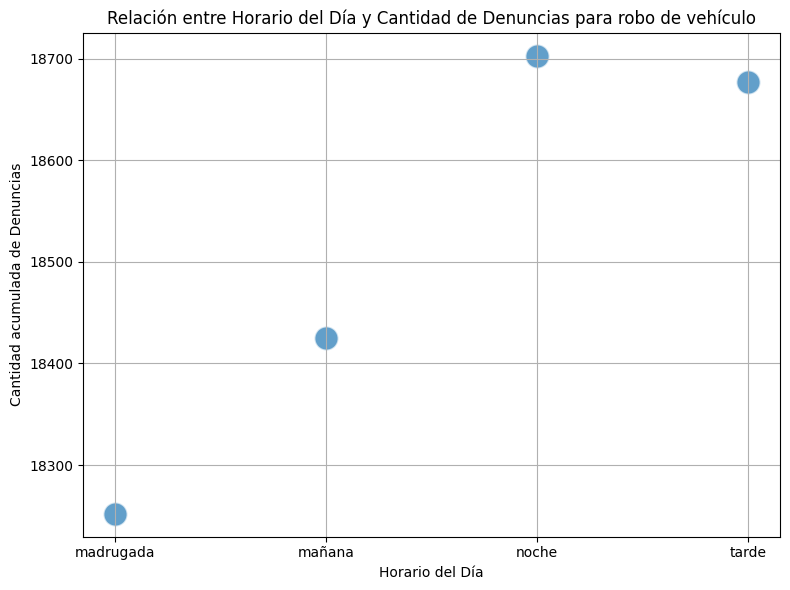

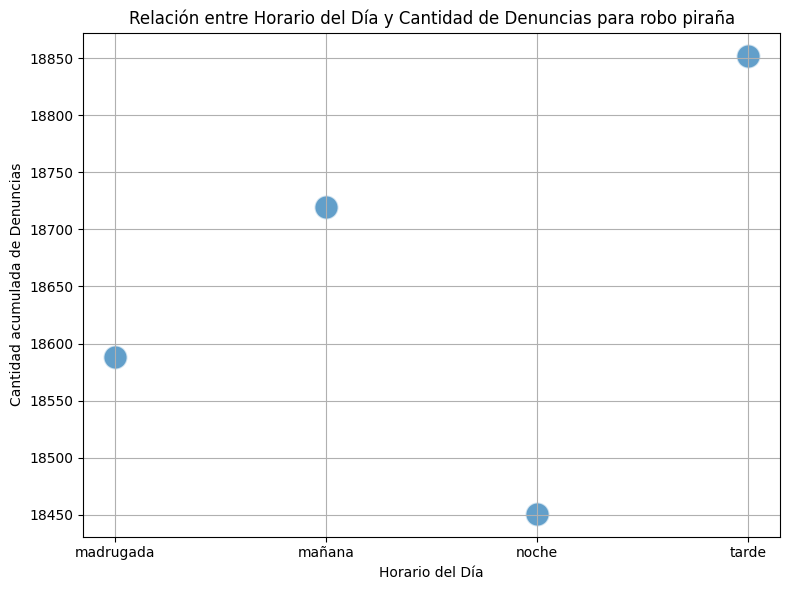

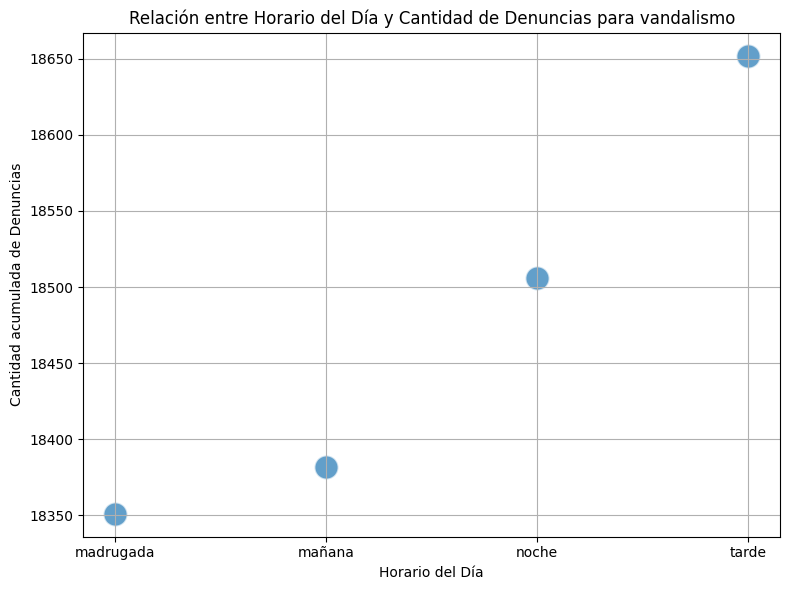

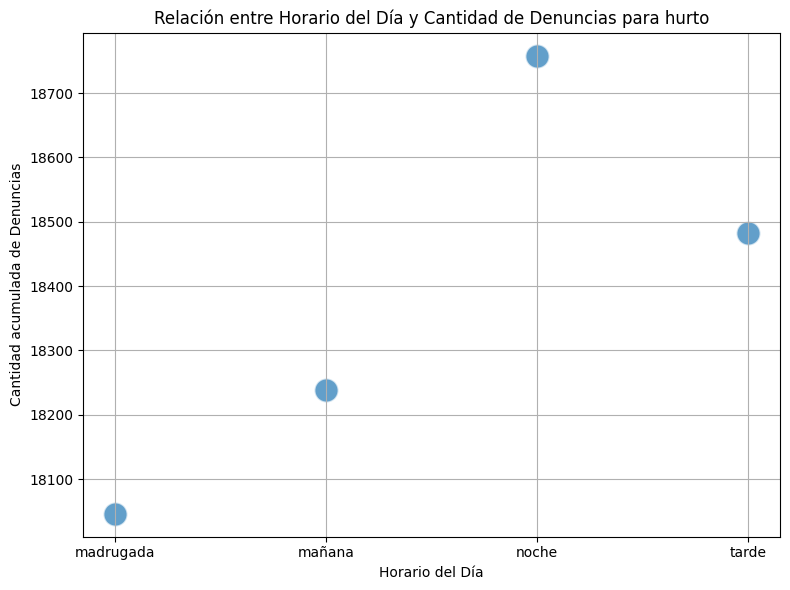

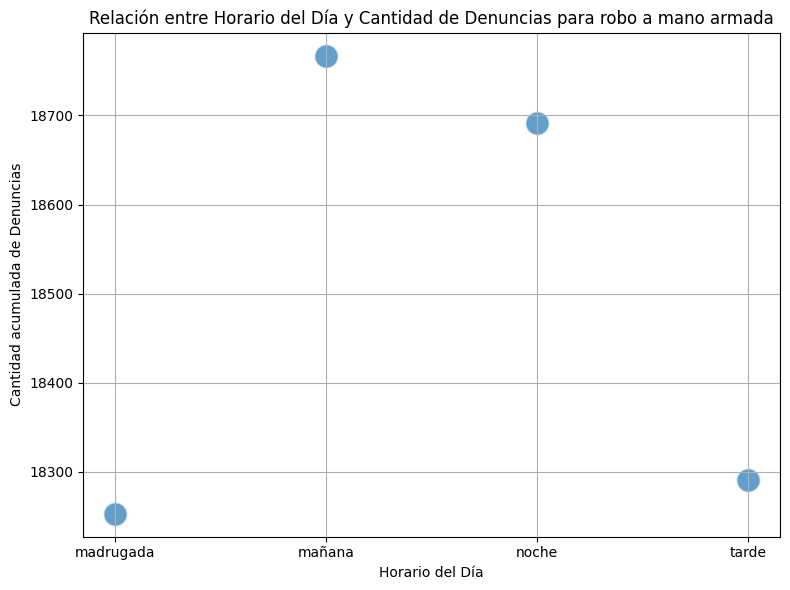

In [21]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[(df['tipo_delito'] != 'N/A') & (df['horario_dia'] != 'N/A') & (df['cantidad_denuncias'] != 0)]

tipos_de_delito = df['tipo_delito'].dropna().unique()

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(8, 6))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    df_tipo_delito = df_tipo_delito.groupby('horario_dia')['cantidad_denuncias'].sum().reset_index()
    sns.scatterplot(data=df_tipo_delito, x='horario_dia', y='cantidad_denuncias', alpha=0.7, s=300)
    plt.xlabel('Horario del Día')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Horario del Día y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Machine Learning

#### Dejamos que el modelo por si, refleje la relaciones a tener en cuenta entre los datos

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


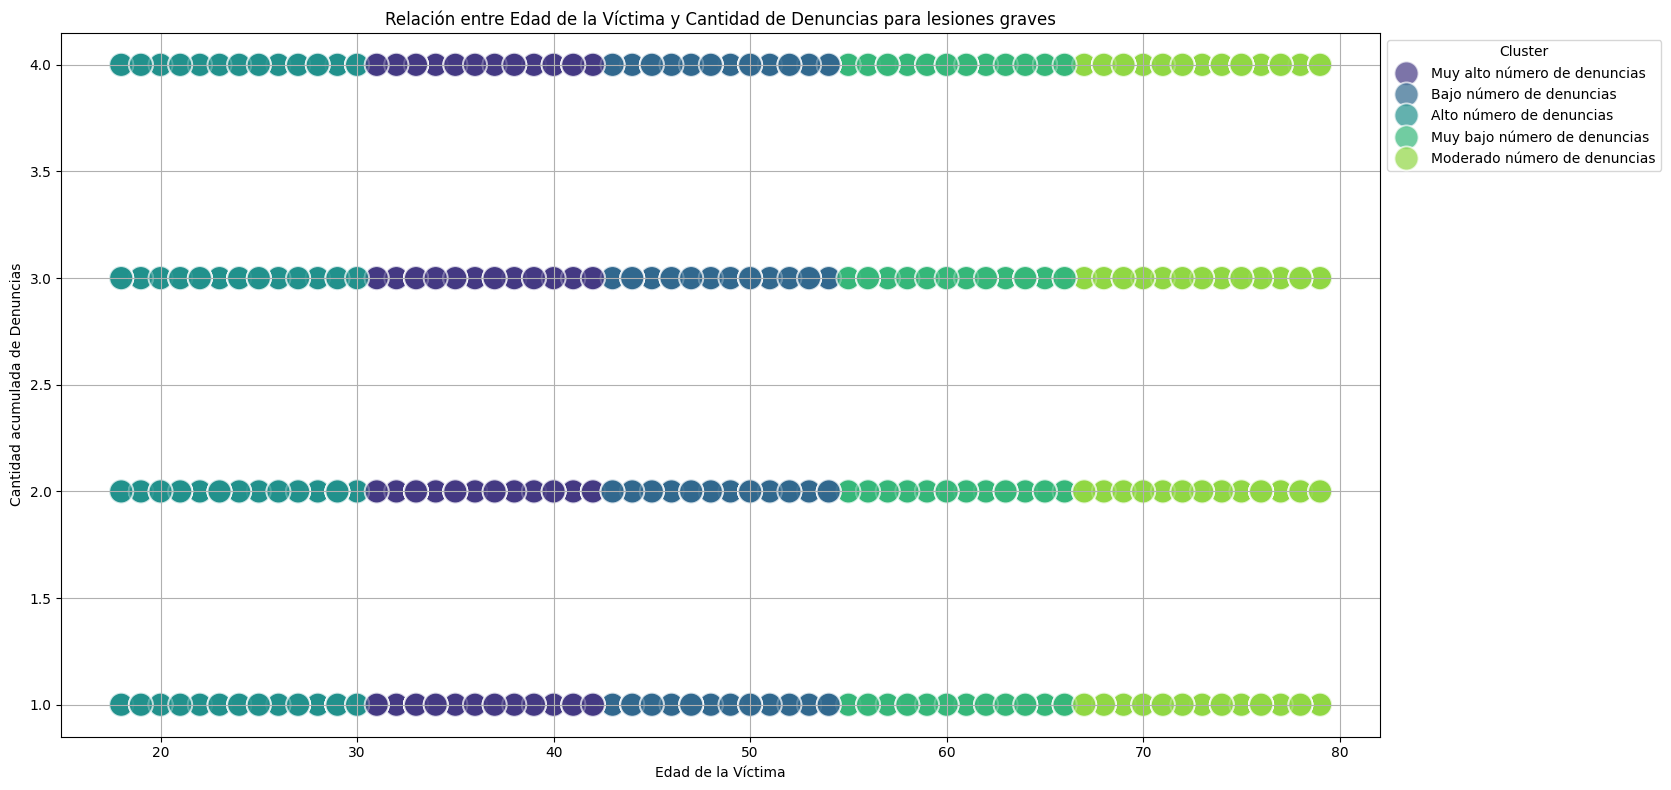

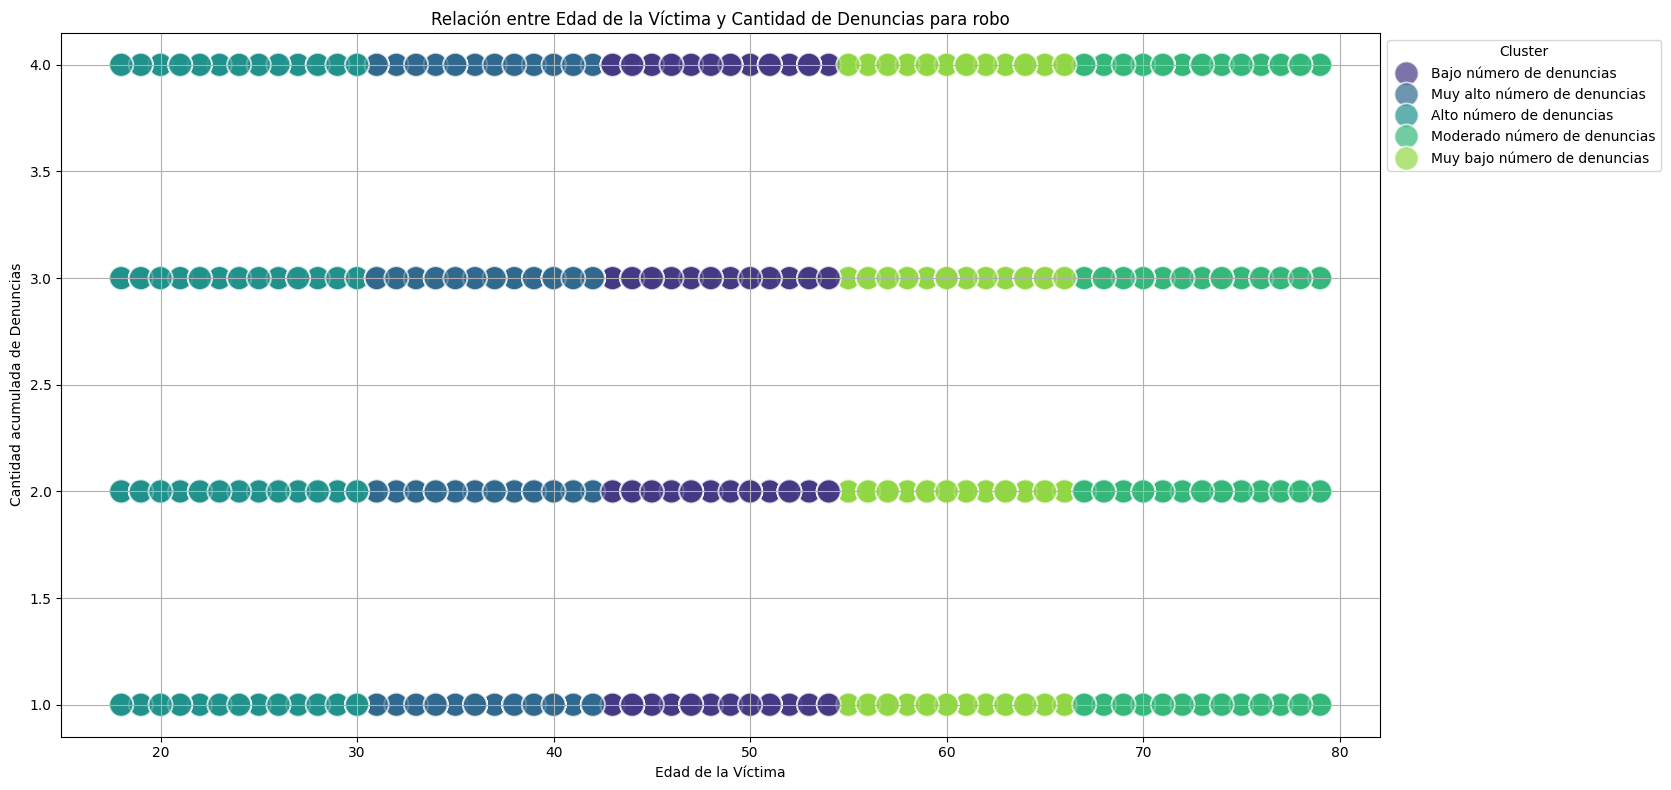

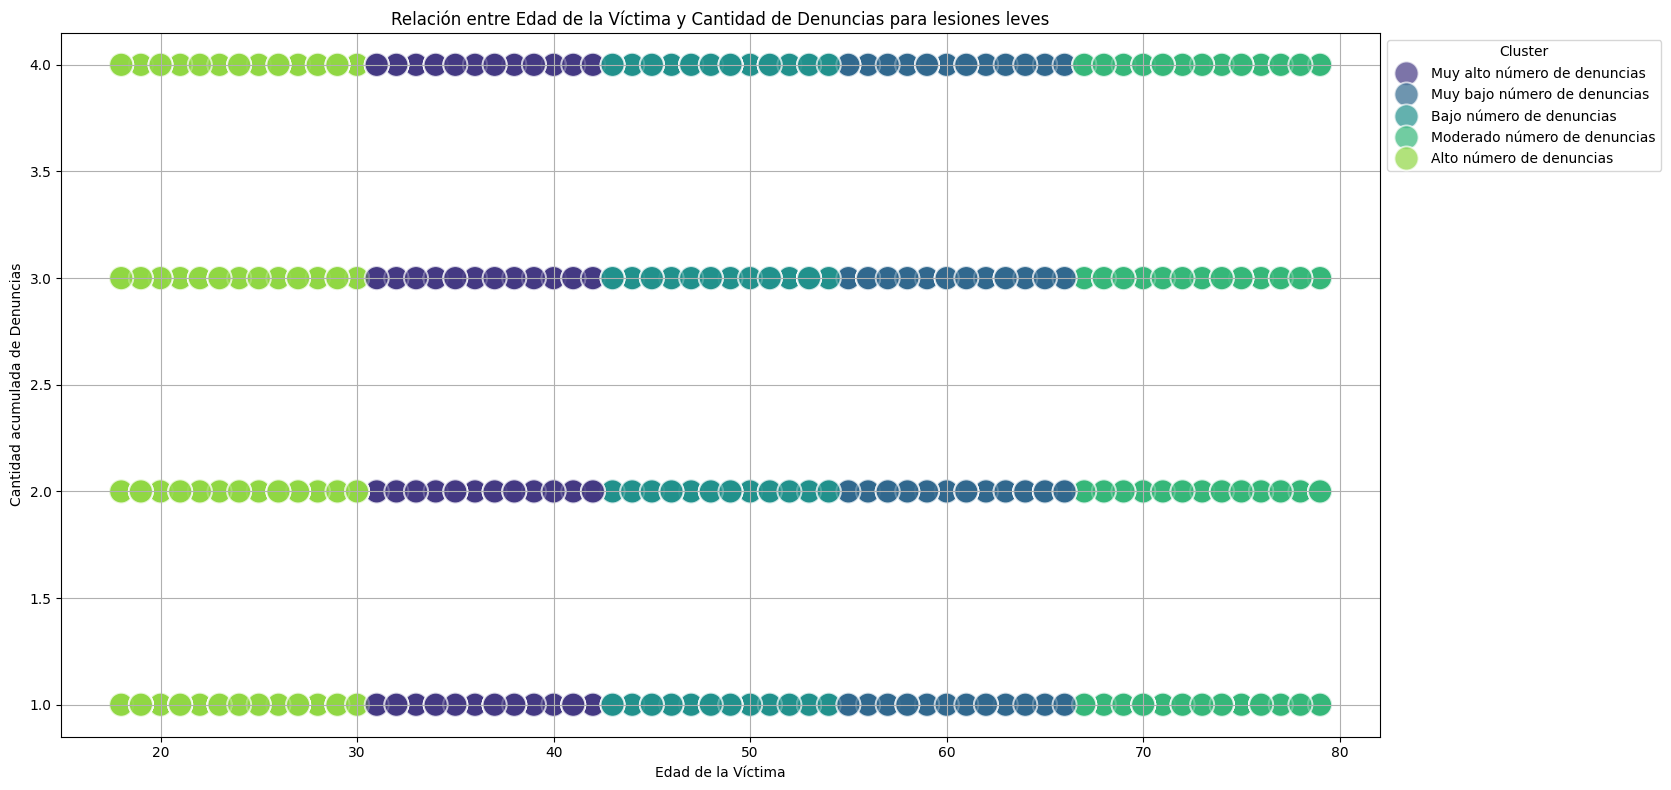

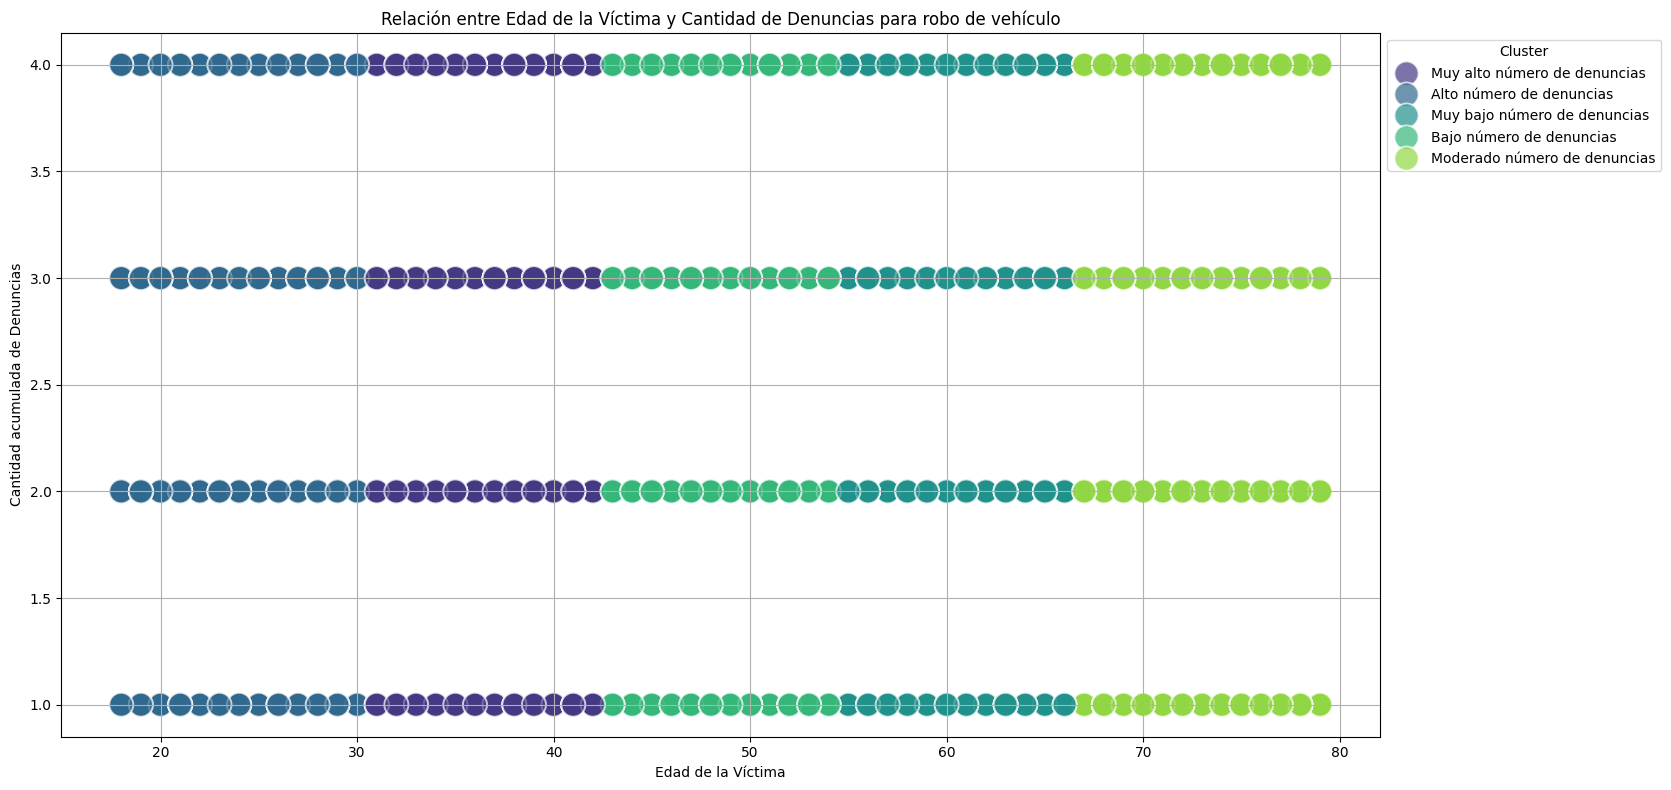

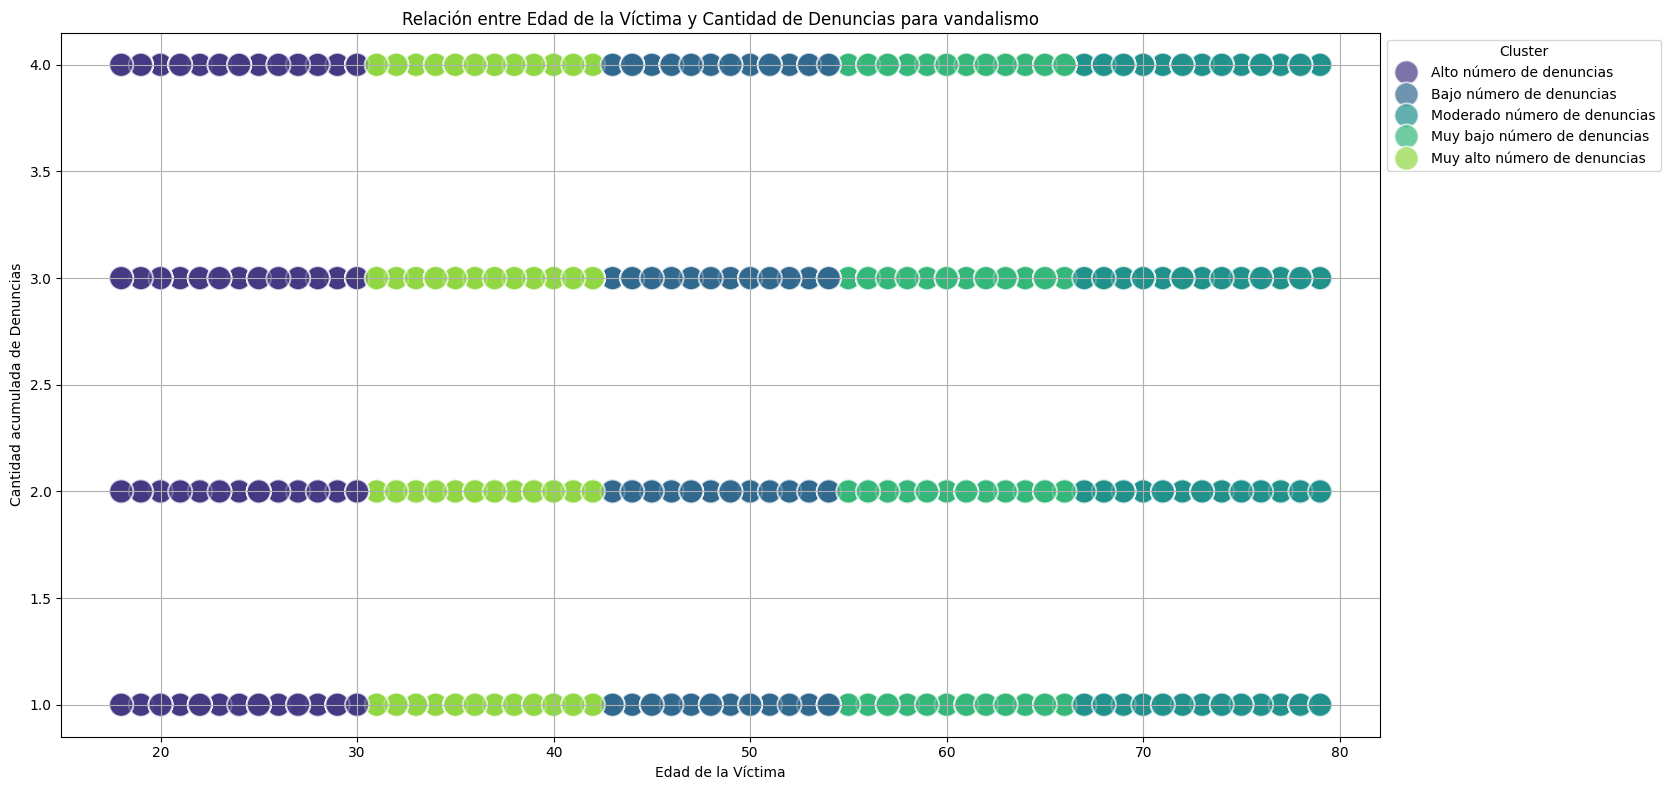

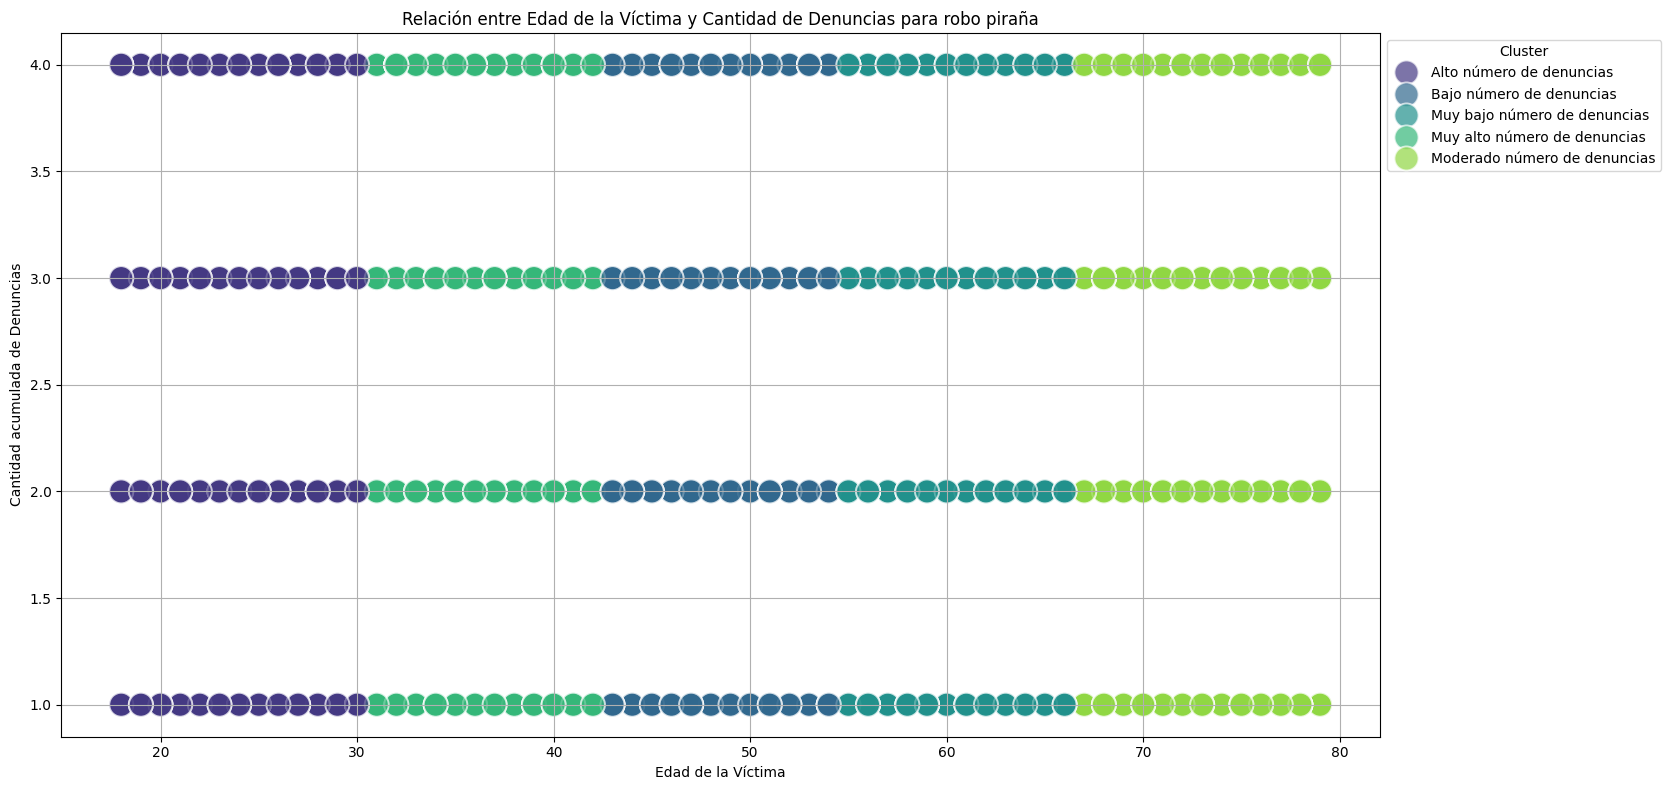

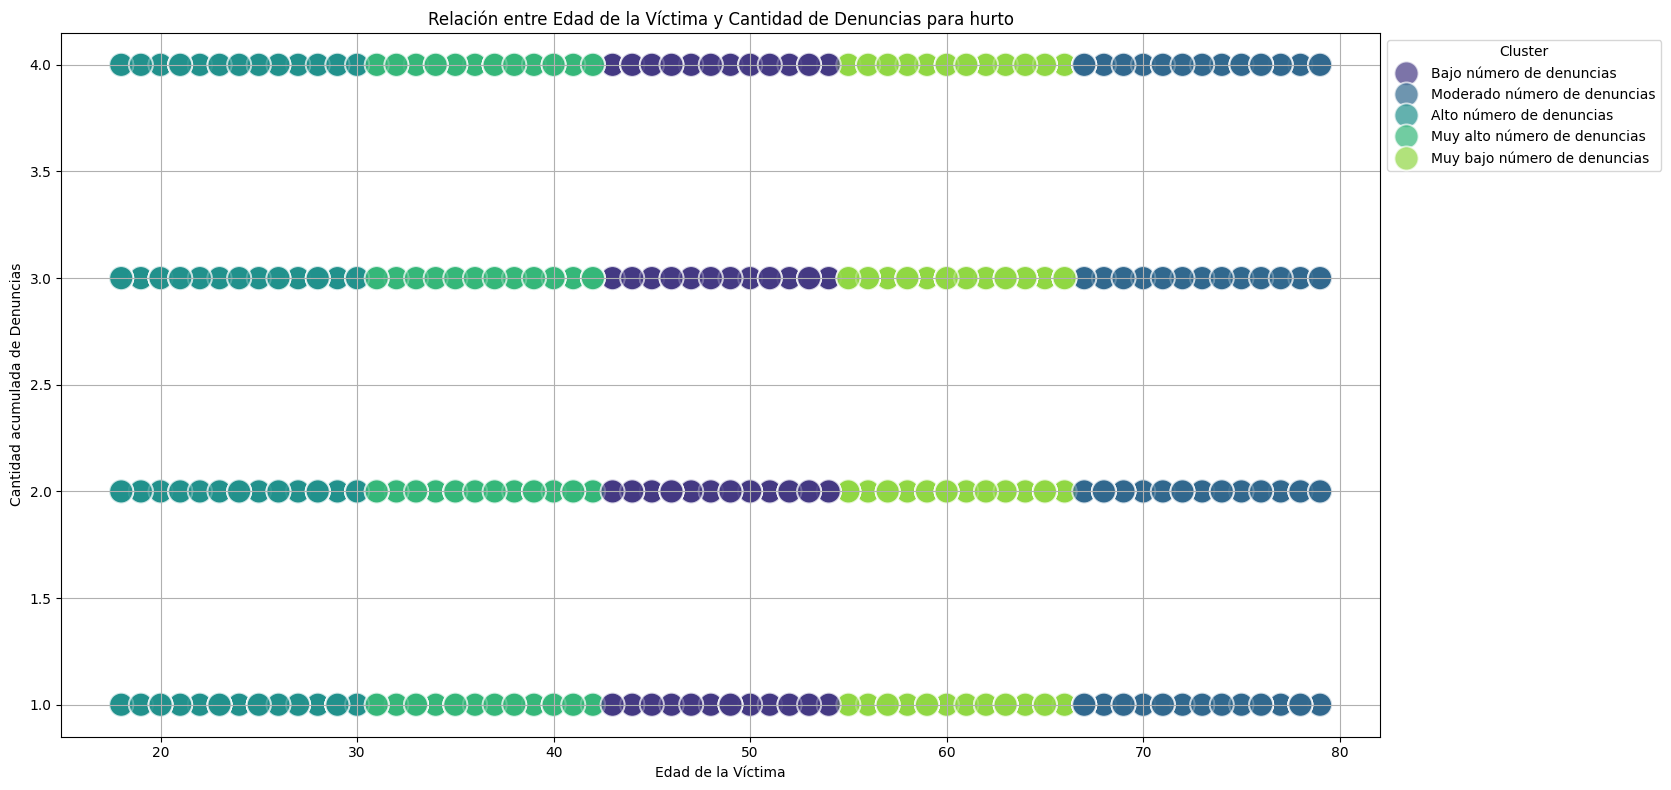

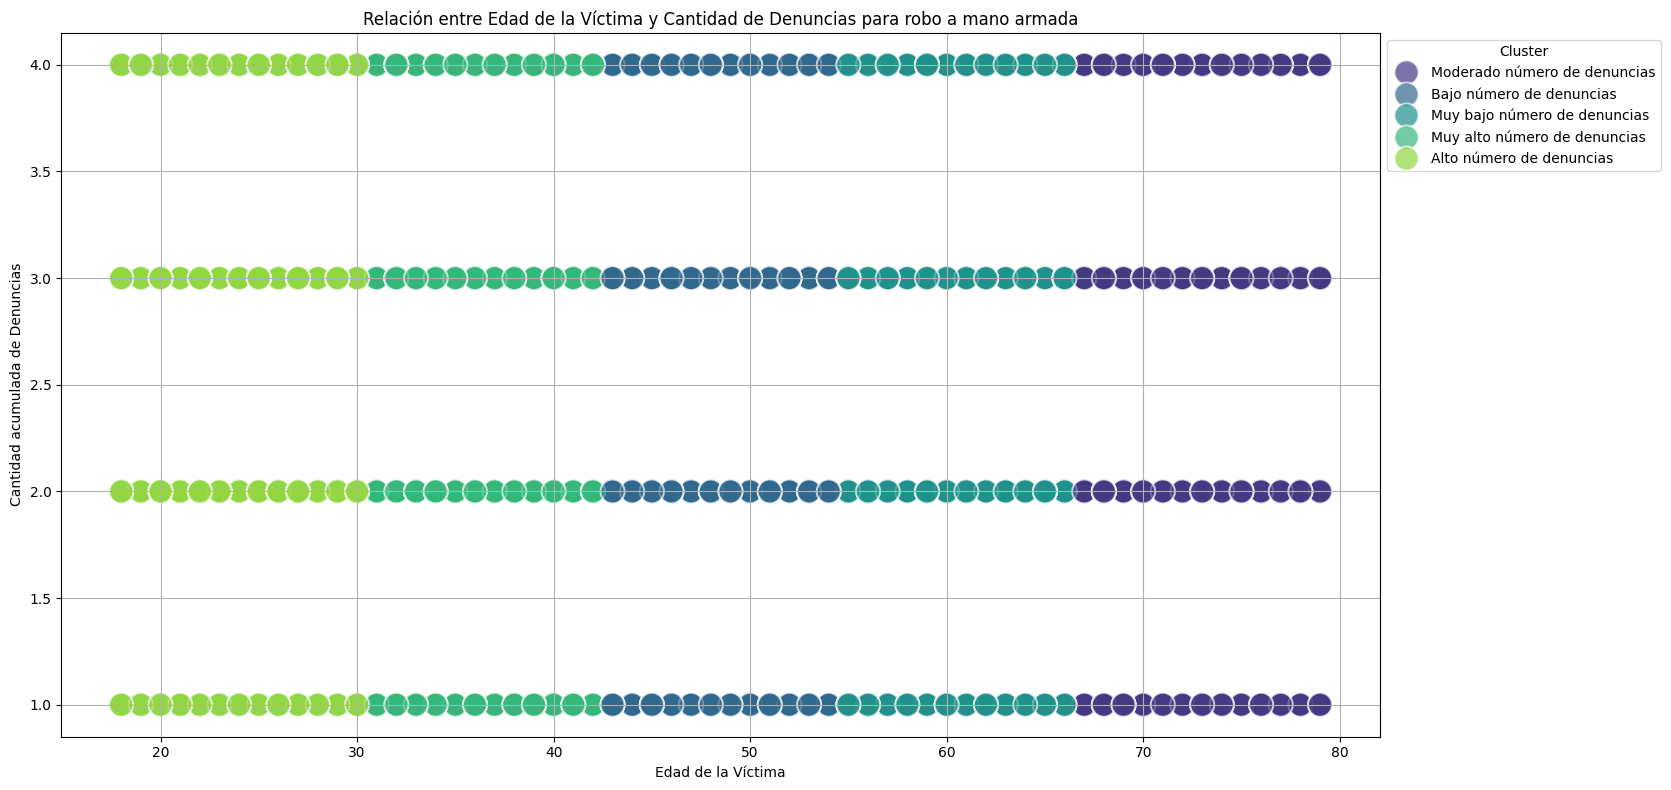

In [22]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[(df['tipo_delito'] != 'N/A') & 
        (df['cantidad_denuncias'] != 0) &
        (df['edad_victima'] != 0)]

le = LabelEncoder()
df['edad_encoded'] = le.fit_transform(df['edad_victima'])

X = df[['edad_encoded', 'cantidad_denuncias']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_labels = {
    0: 'Bajo número de denuncias',
    1: 'Alto número de denuncias',
    2: 'Moderado número de denuncias',
    3: 'Muy alto número de denuncias',
    4: 'Muy bajo número de denuncias'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

tipos_de_delito = df['tipo_delito'].dropna().unique()

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(14, 8))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    
    sns.scatterplot(data=df_tipo_delito, x='edad_victima', y='cantidad_denuncias', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Edad de la Víctima')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Edad de la Víctima y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


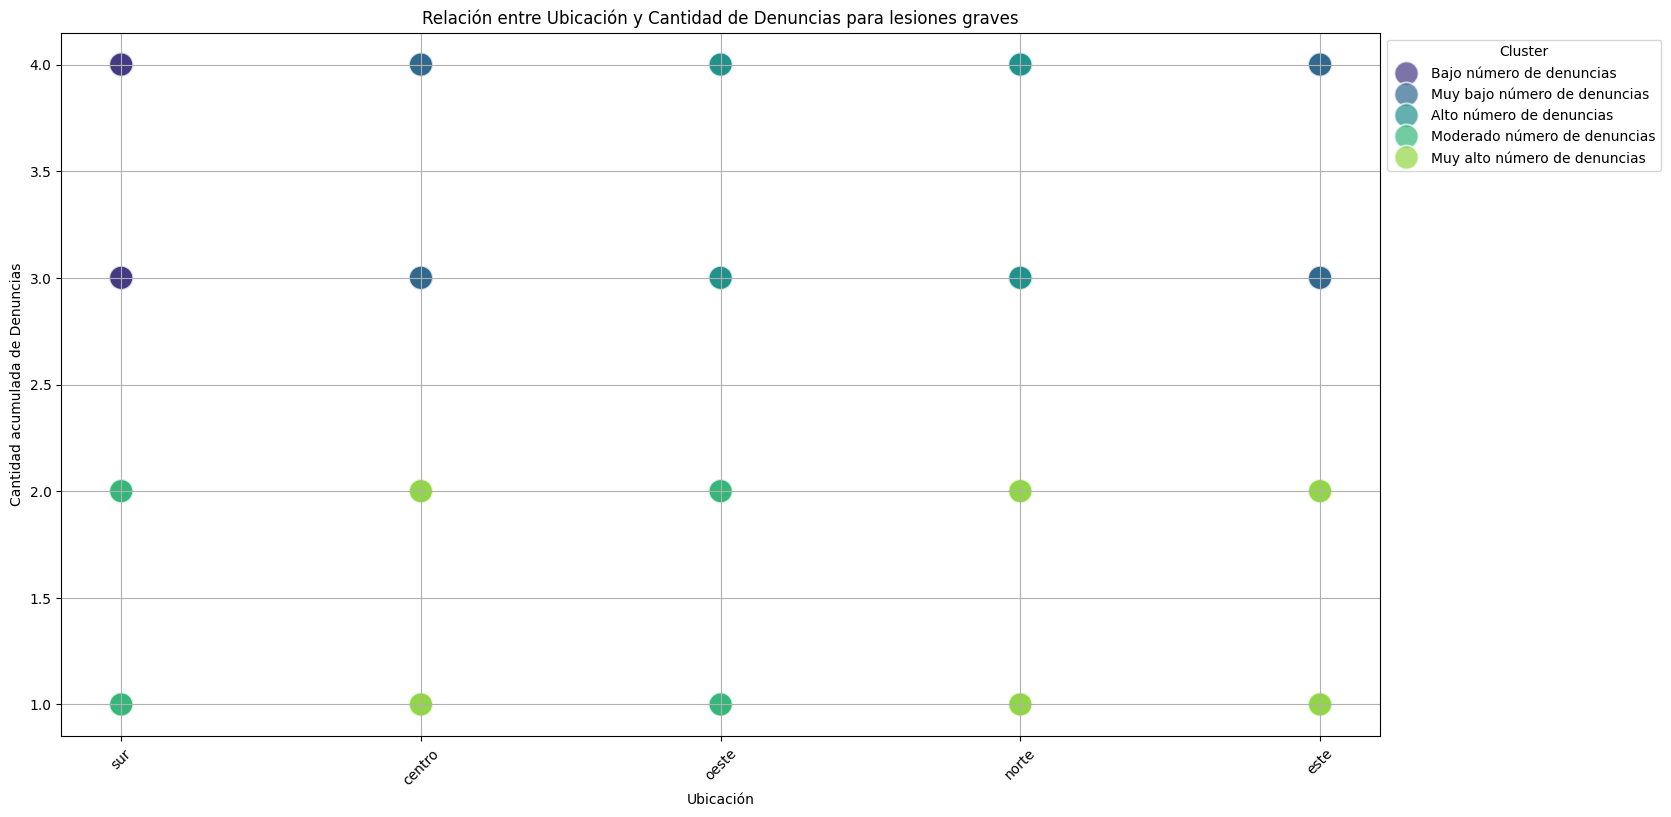

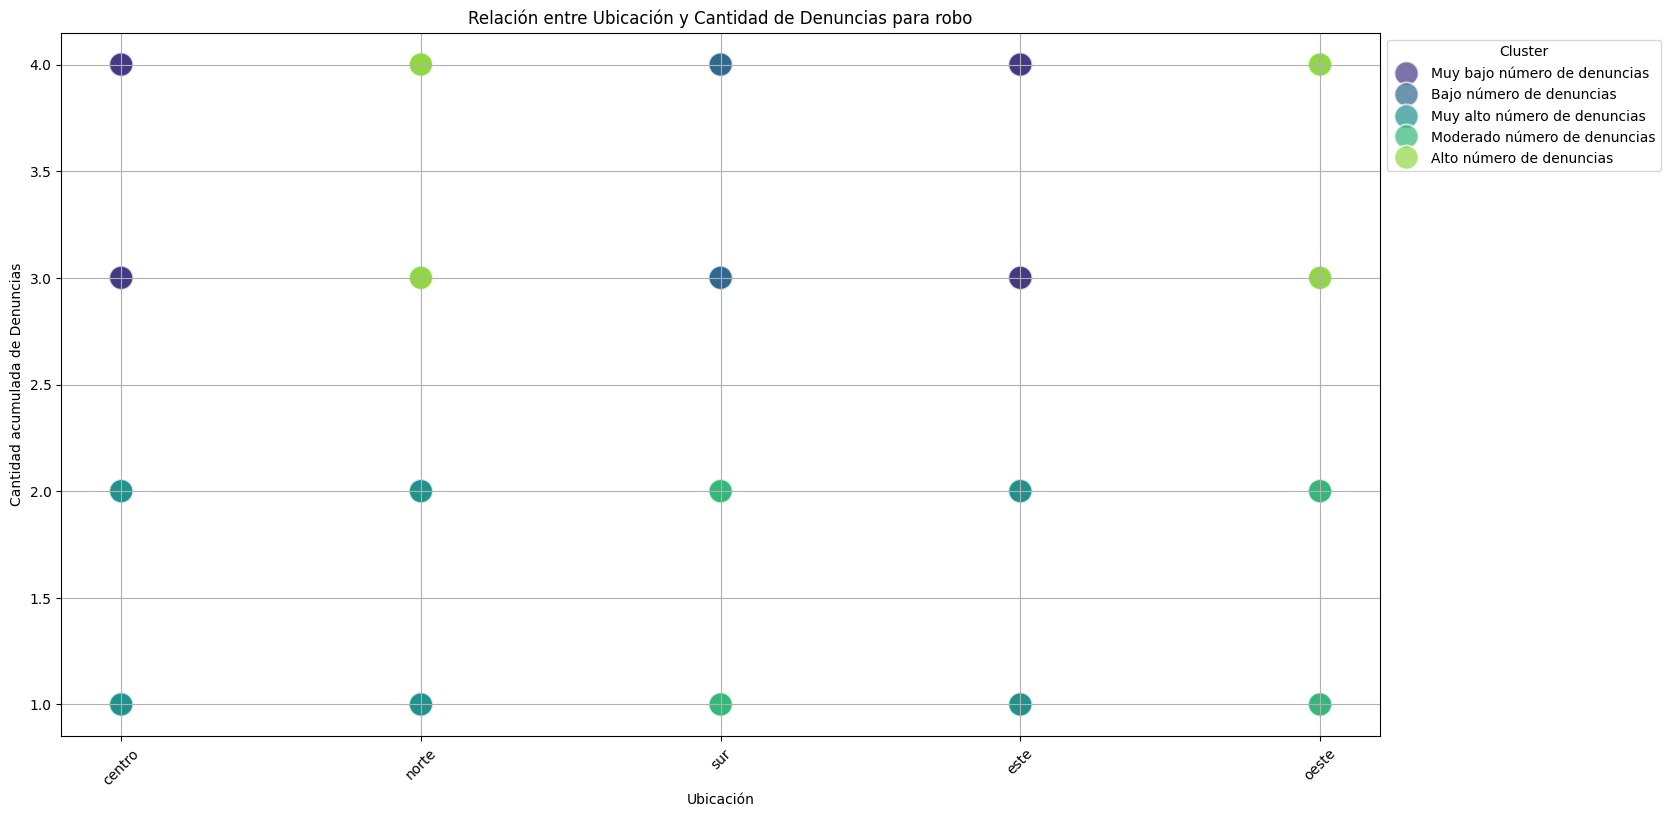

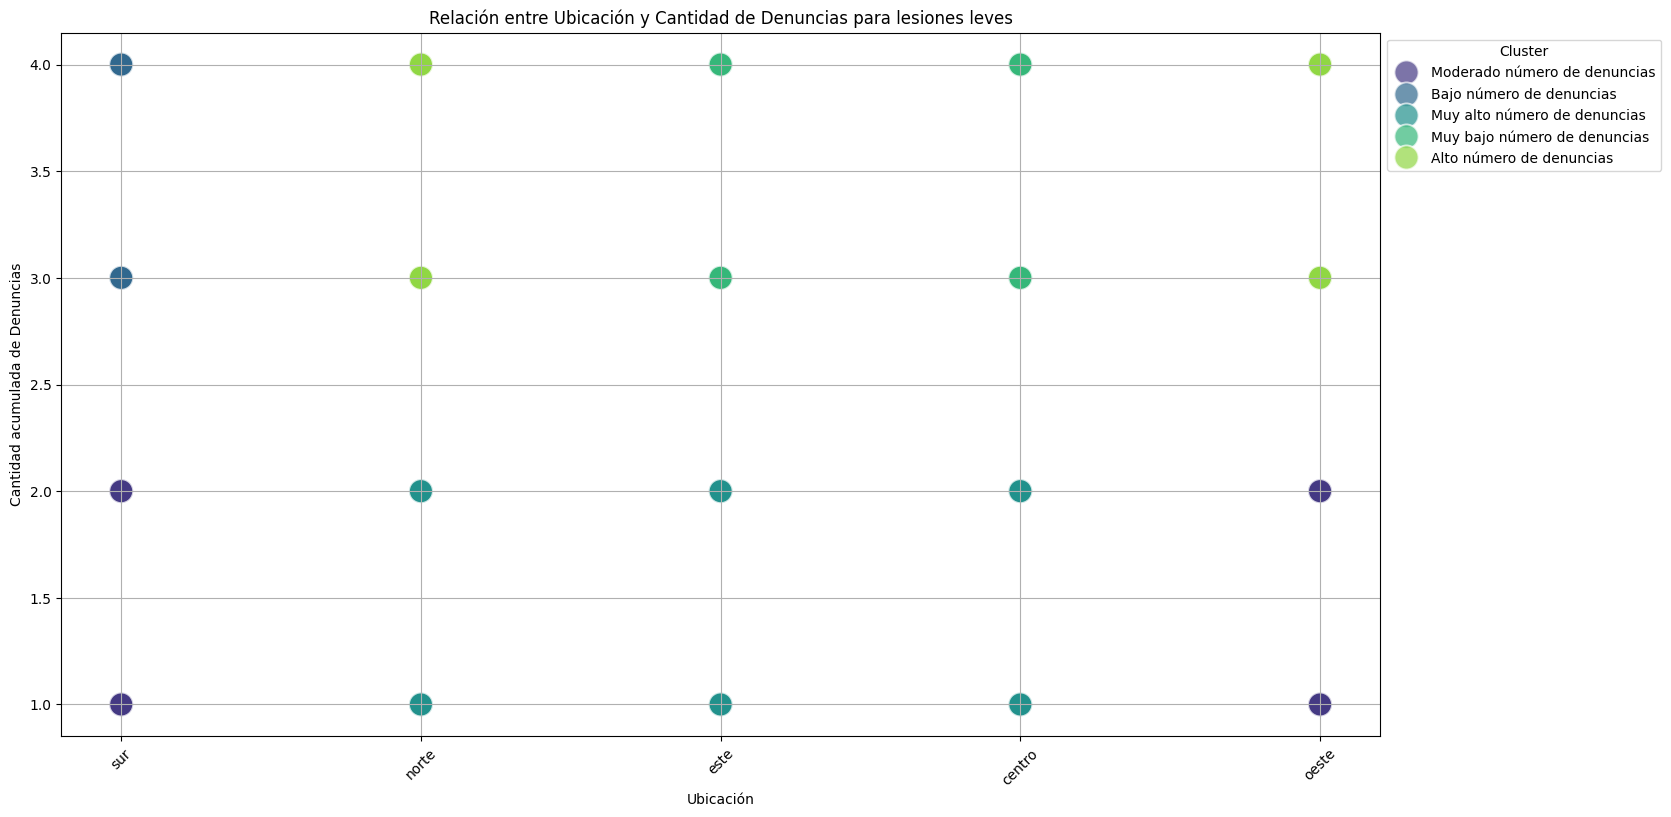

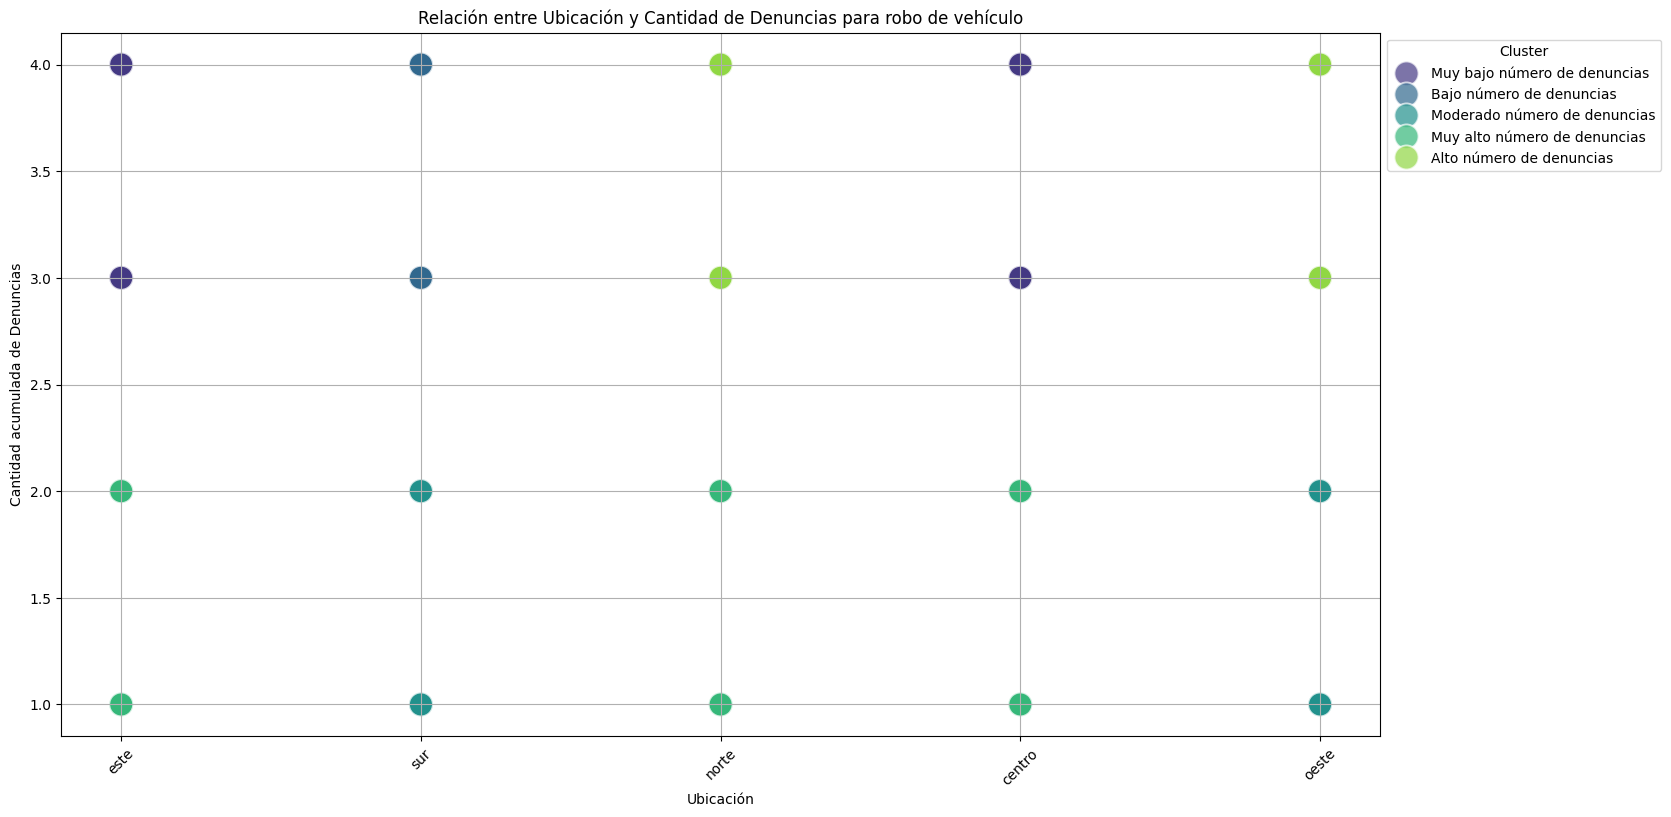

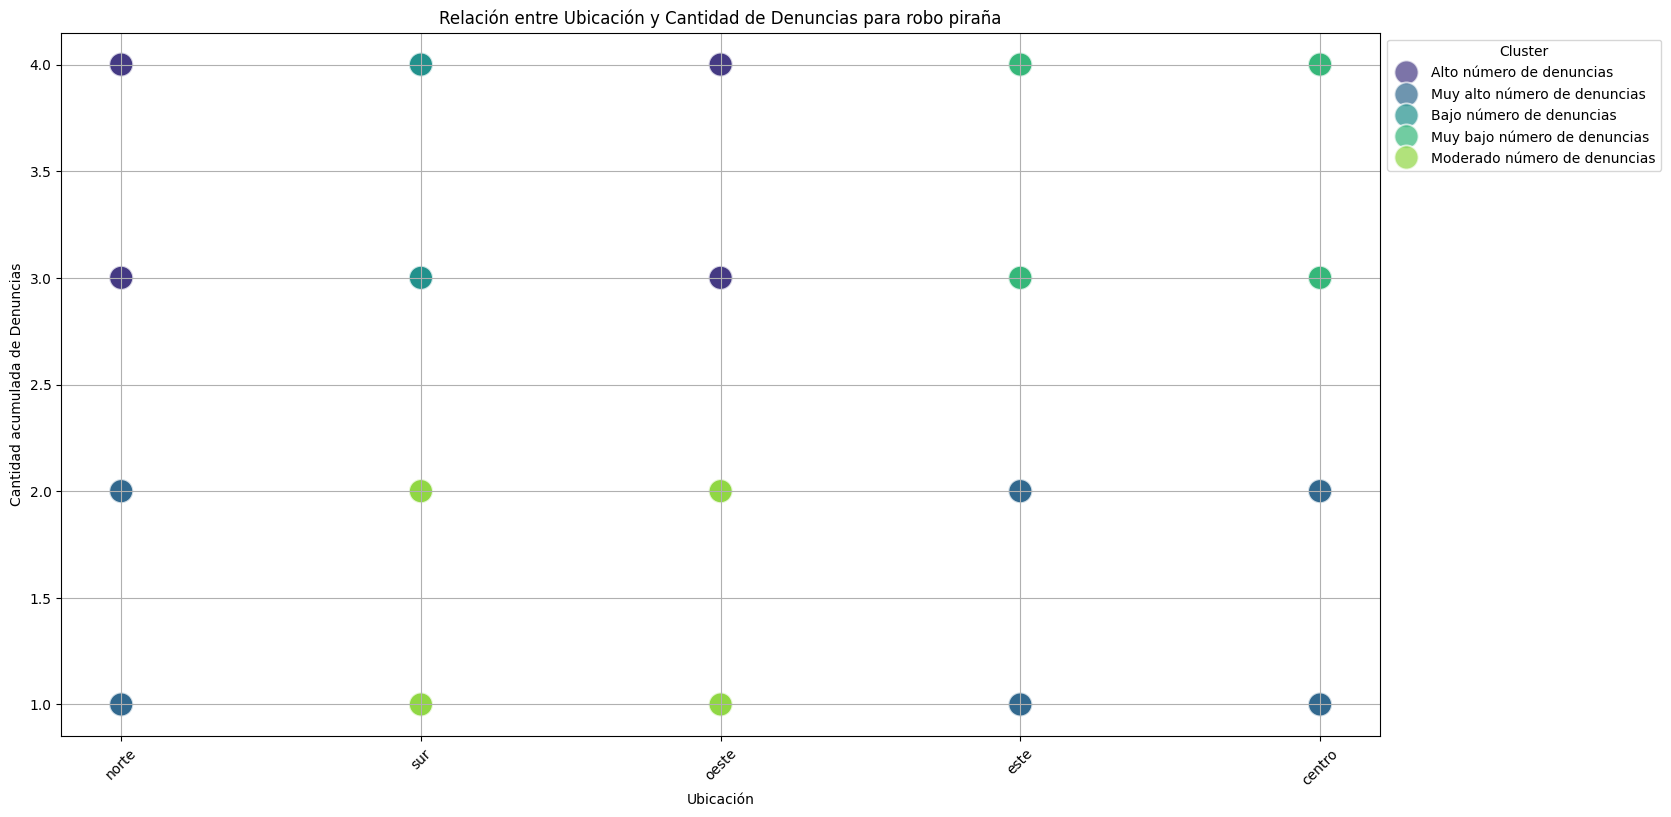

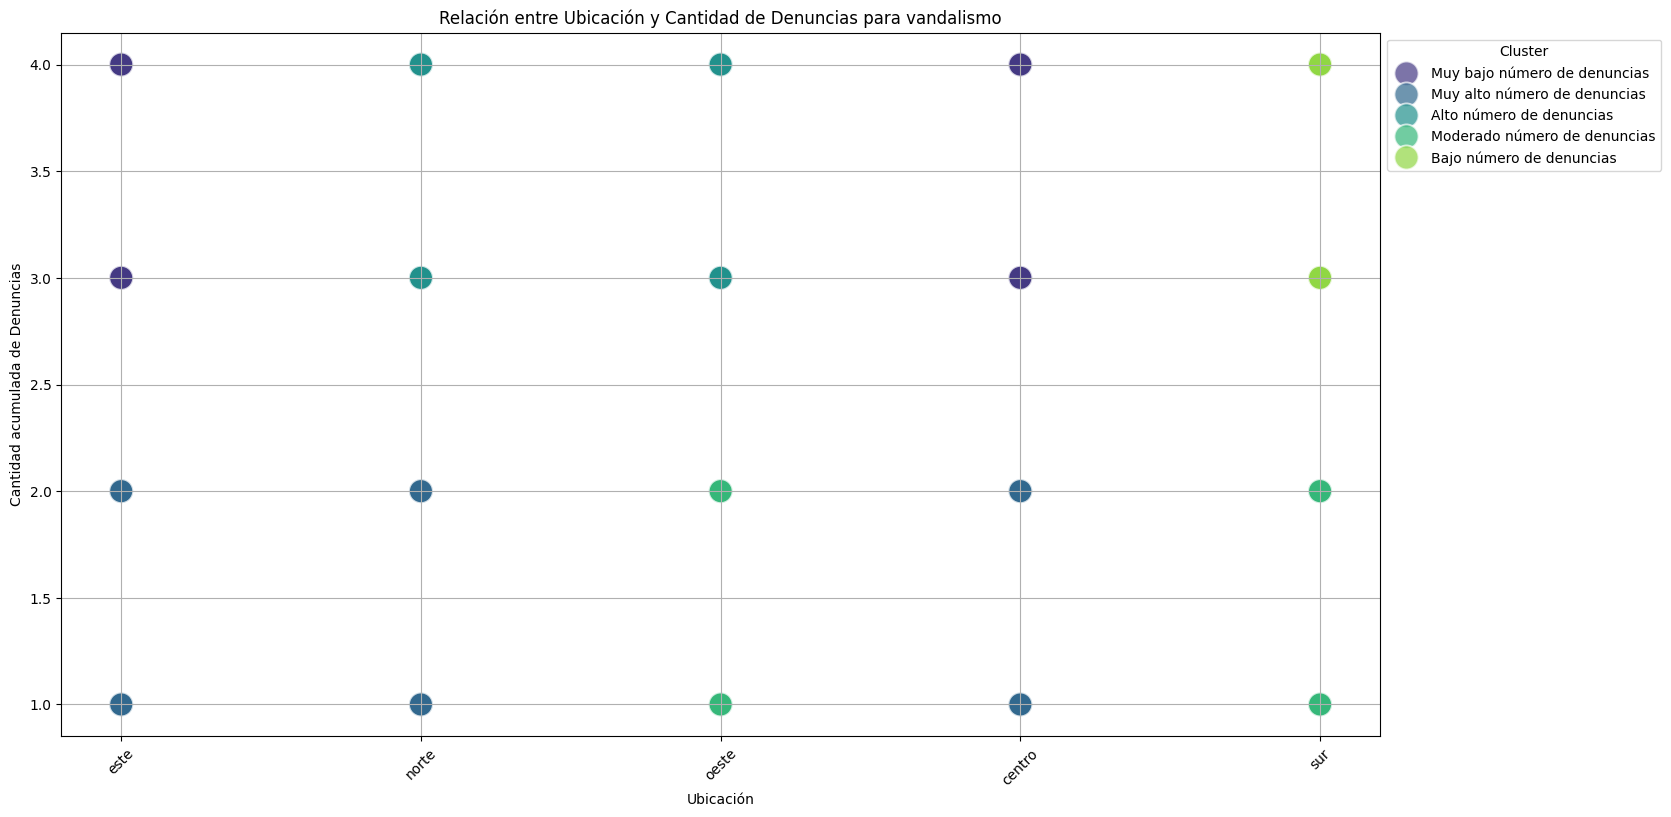

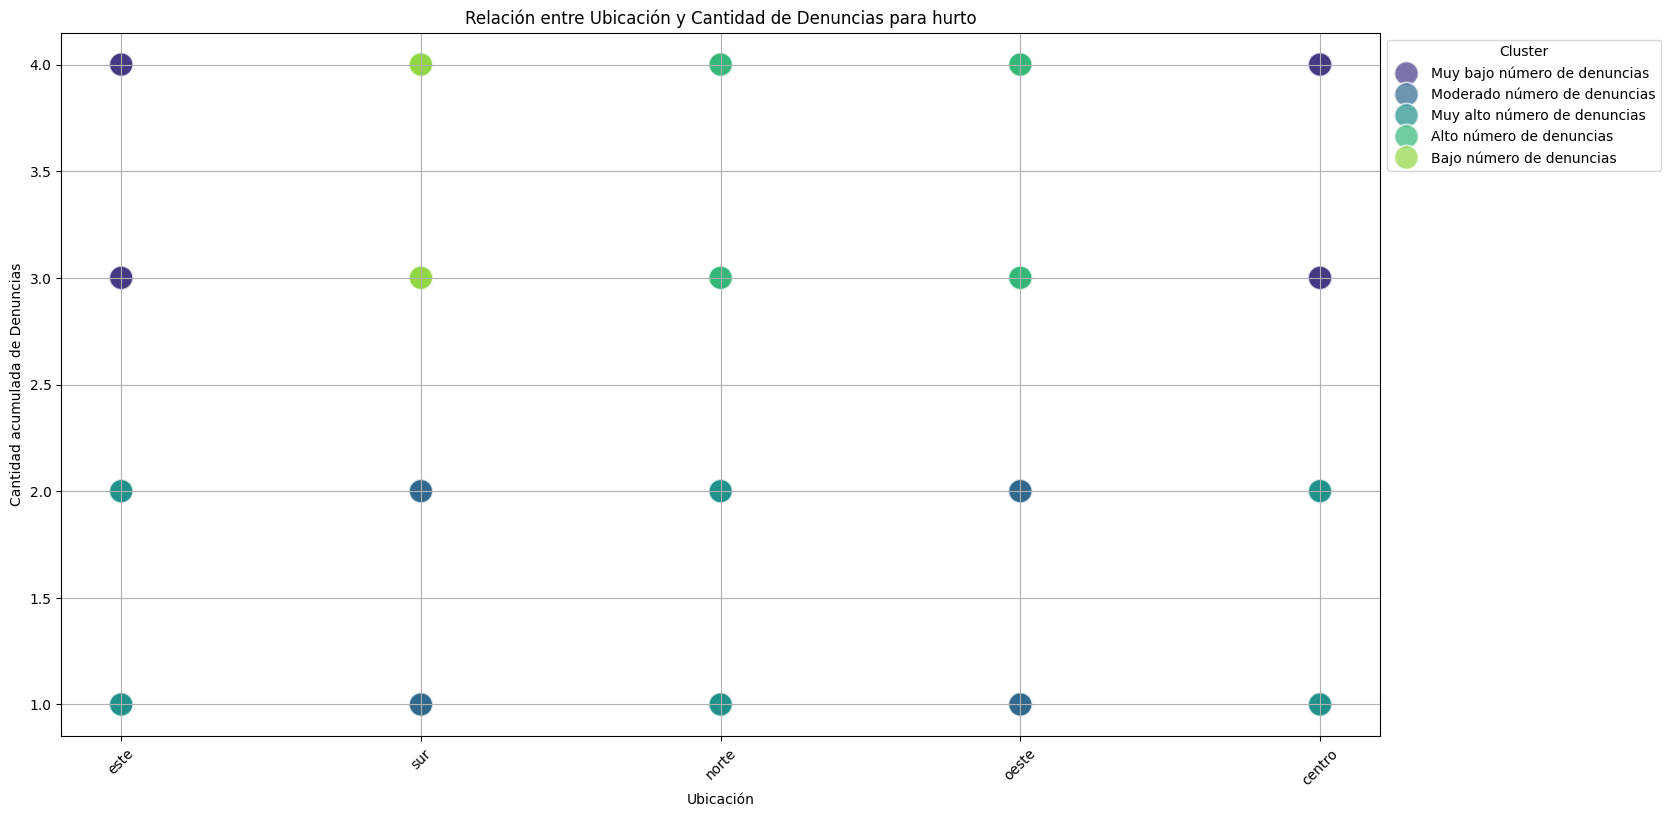

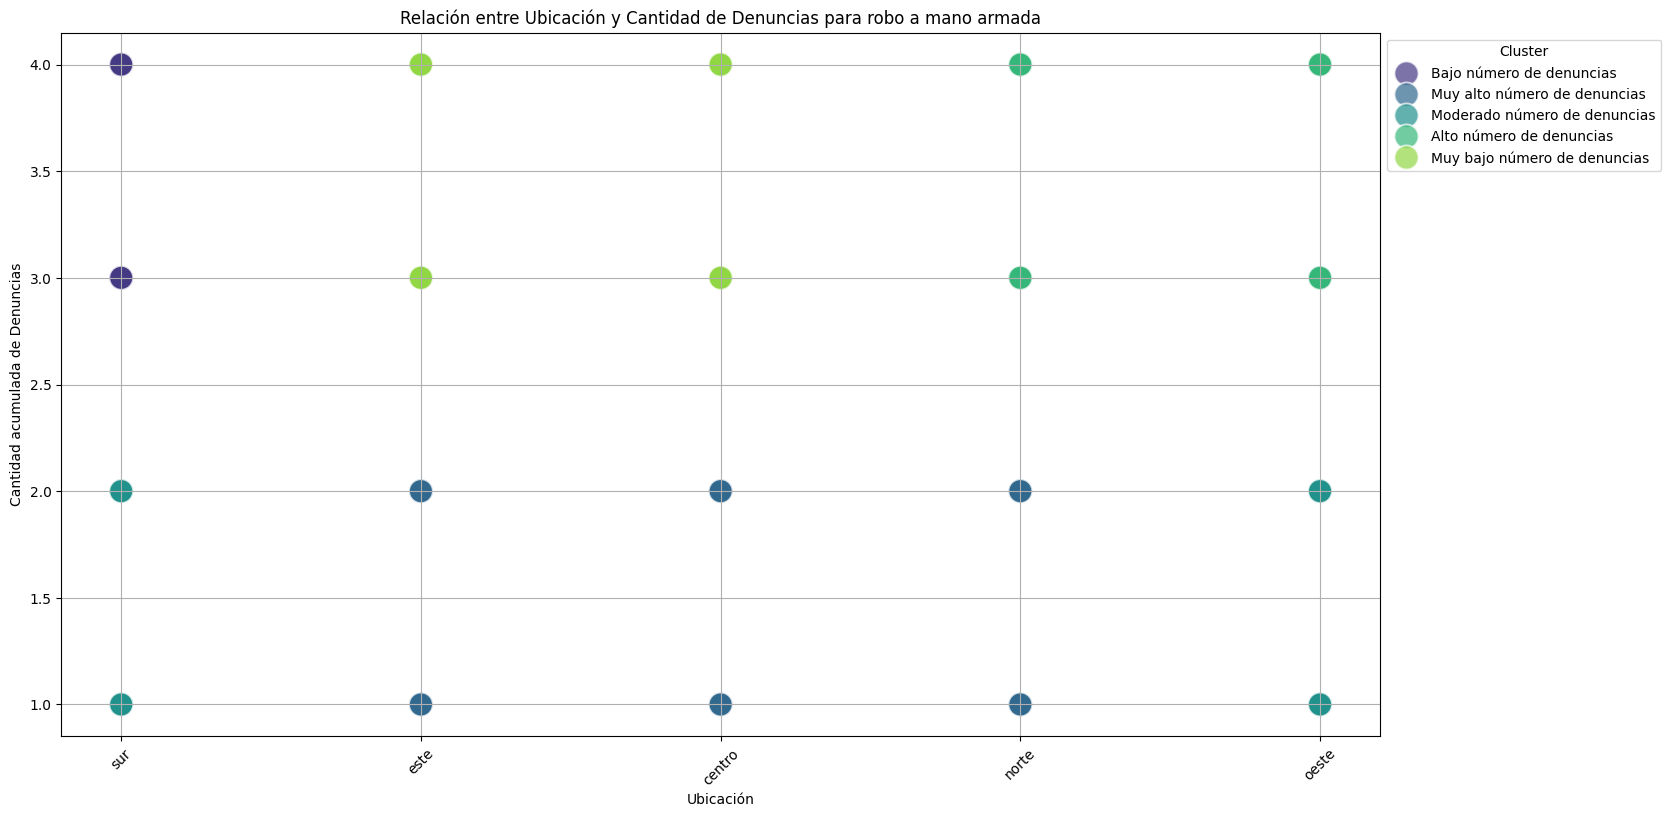

In [23]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[(df['tipo_delito'] != 'N/A') & (df['cantidad_denuncias'] != 0)]
df = df[df['ubicacion'] != 'N/A']

le = LabelEncoder()
df['ubicacion_encoded'] = le.fit_transform(df['ubicacion'])

kmeans = KMeans(n_clusters=5, random_state=42)

df['cluster'] = kmeans.fit_predict(df[['ubicacion_encoded', 'cantidad_denuncias']])

cluster_labels = {
    0: 'Bajo número de denuncias',
    1: 'Alto número de denuncias',
    2: 'Moderado número de denuncias',
    3: 'Muy alto número de denuncias',
    4: 'Muy bajo número de denuncias'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

tipos_de_delito = df['tipo_delito'].dropna().unique()

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(14, 8))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    
    sns.scatterplot(data=df_tipo_delito, x='ubicacion', y='cantidad_denuncias', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Ubicación')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Ubicación y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


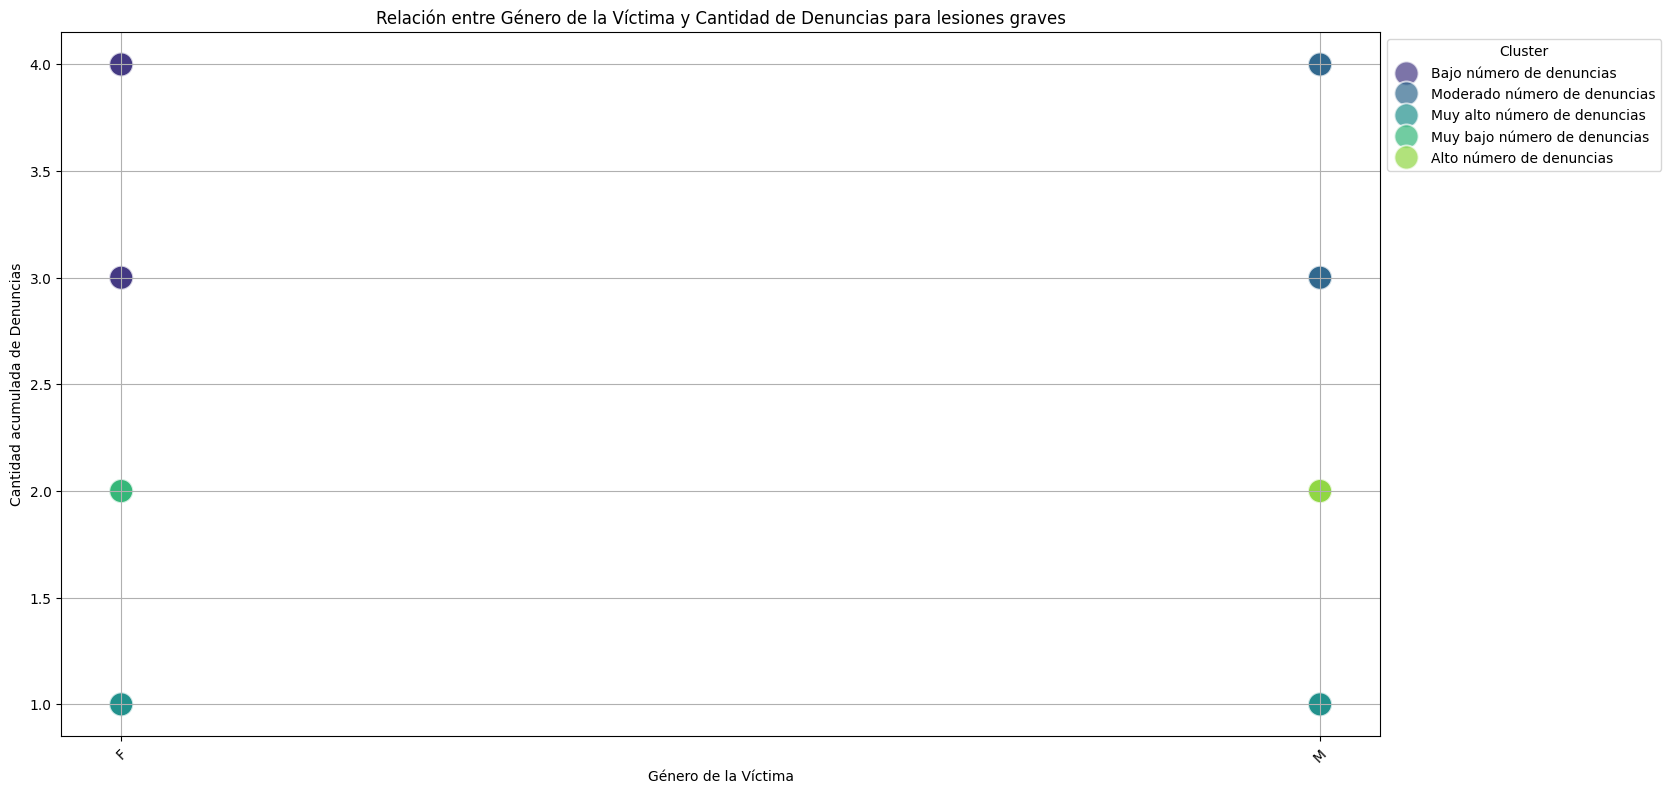

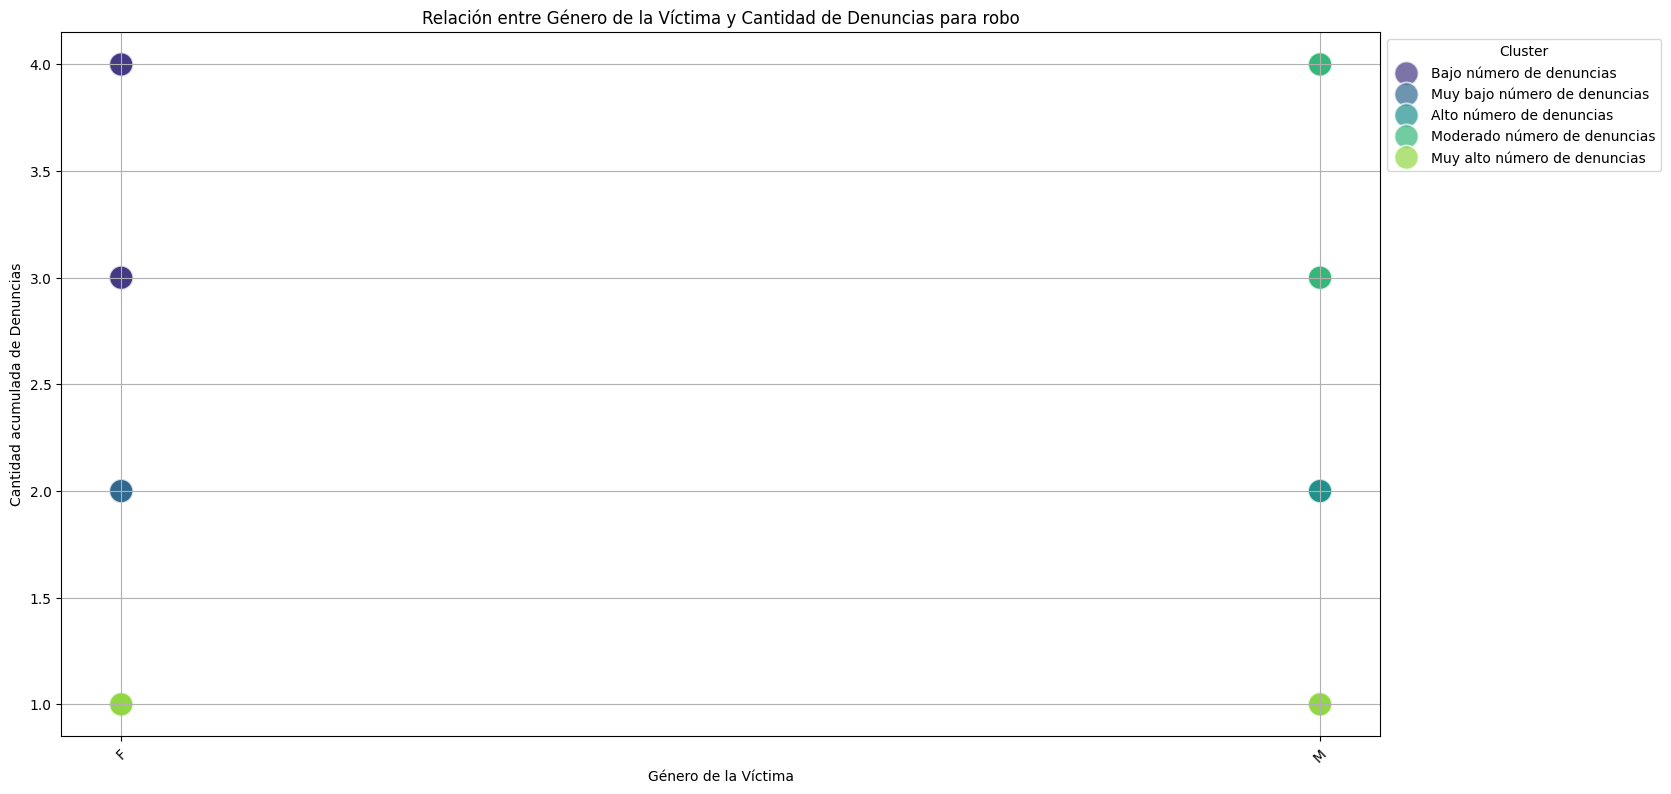

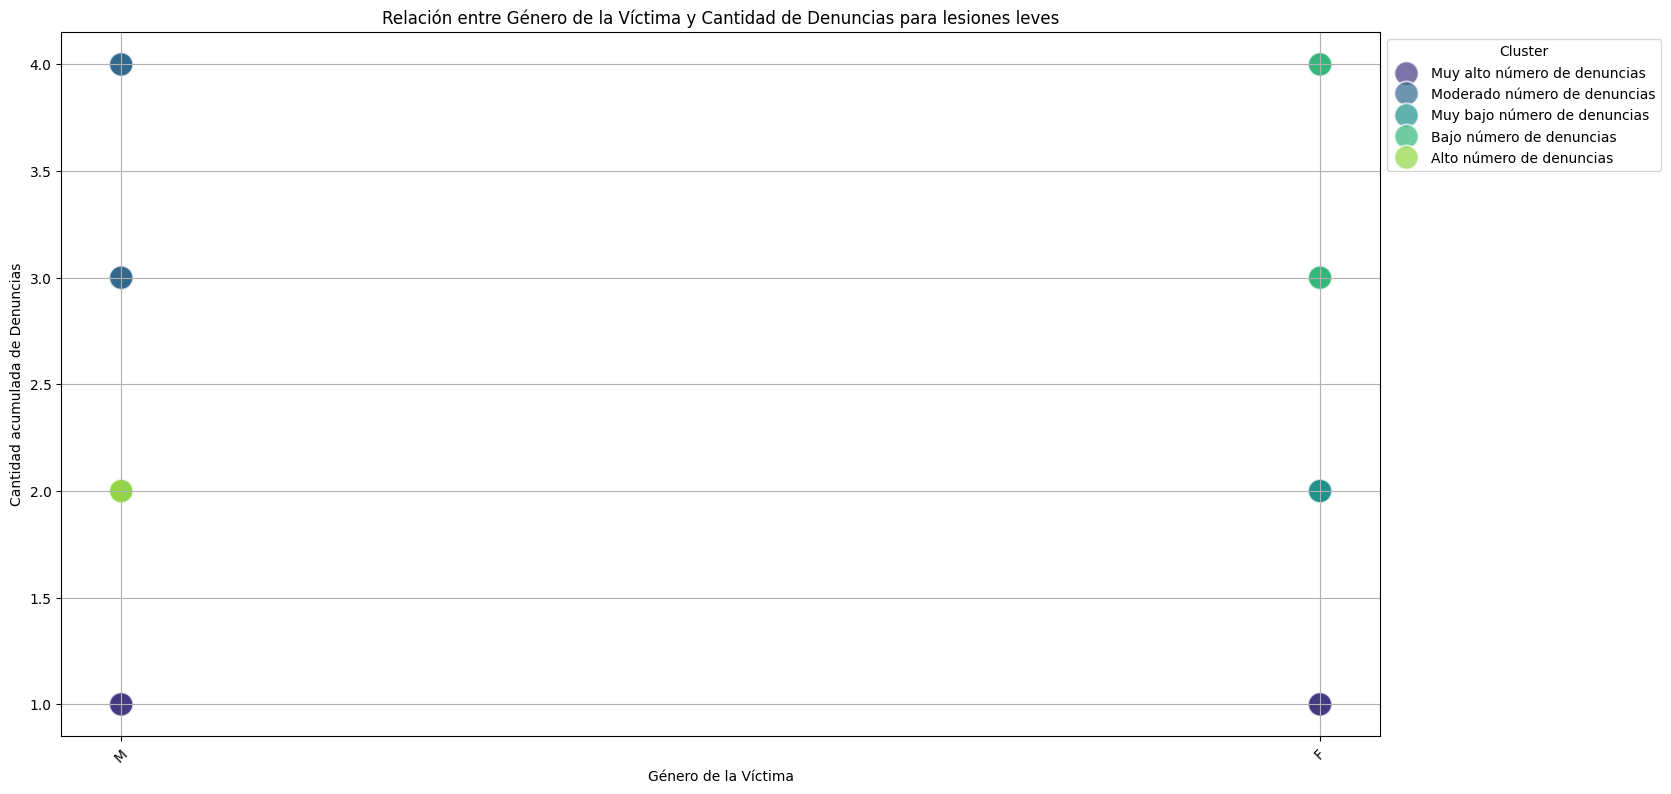

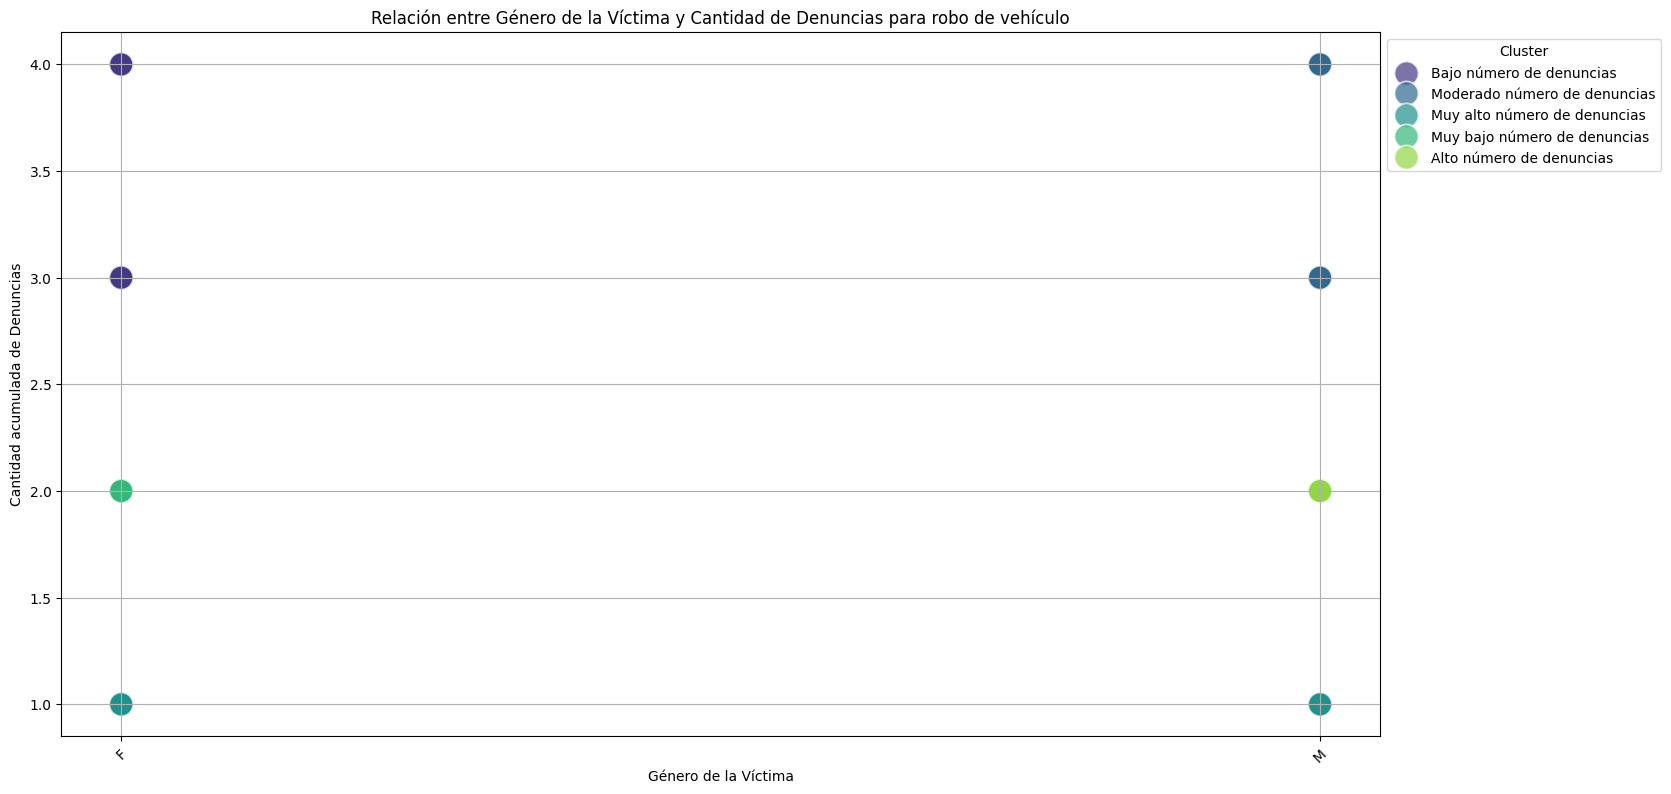

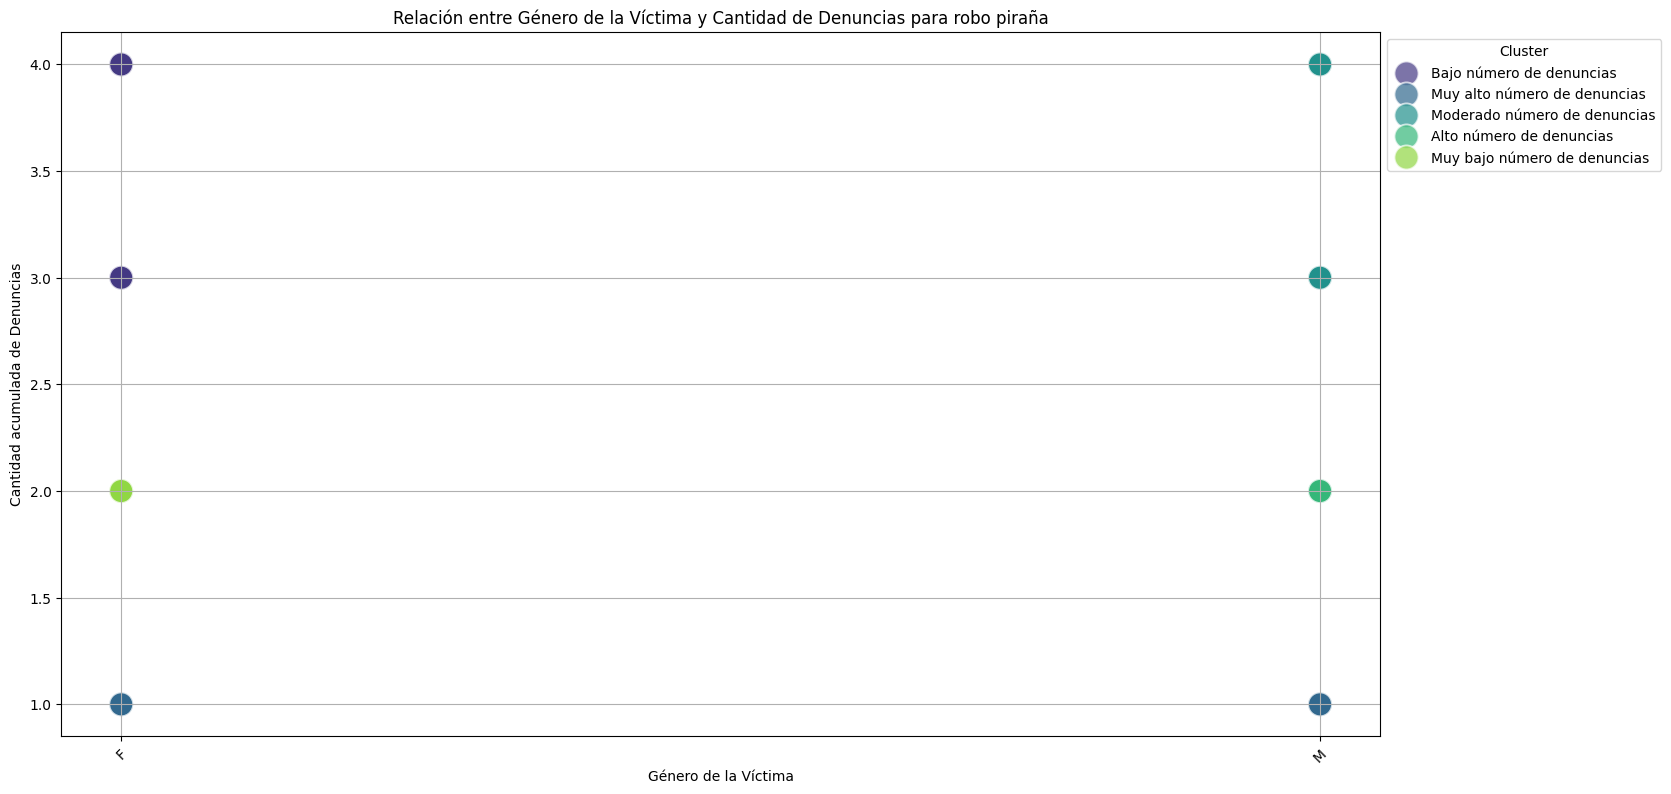

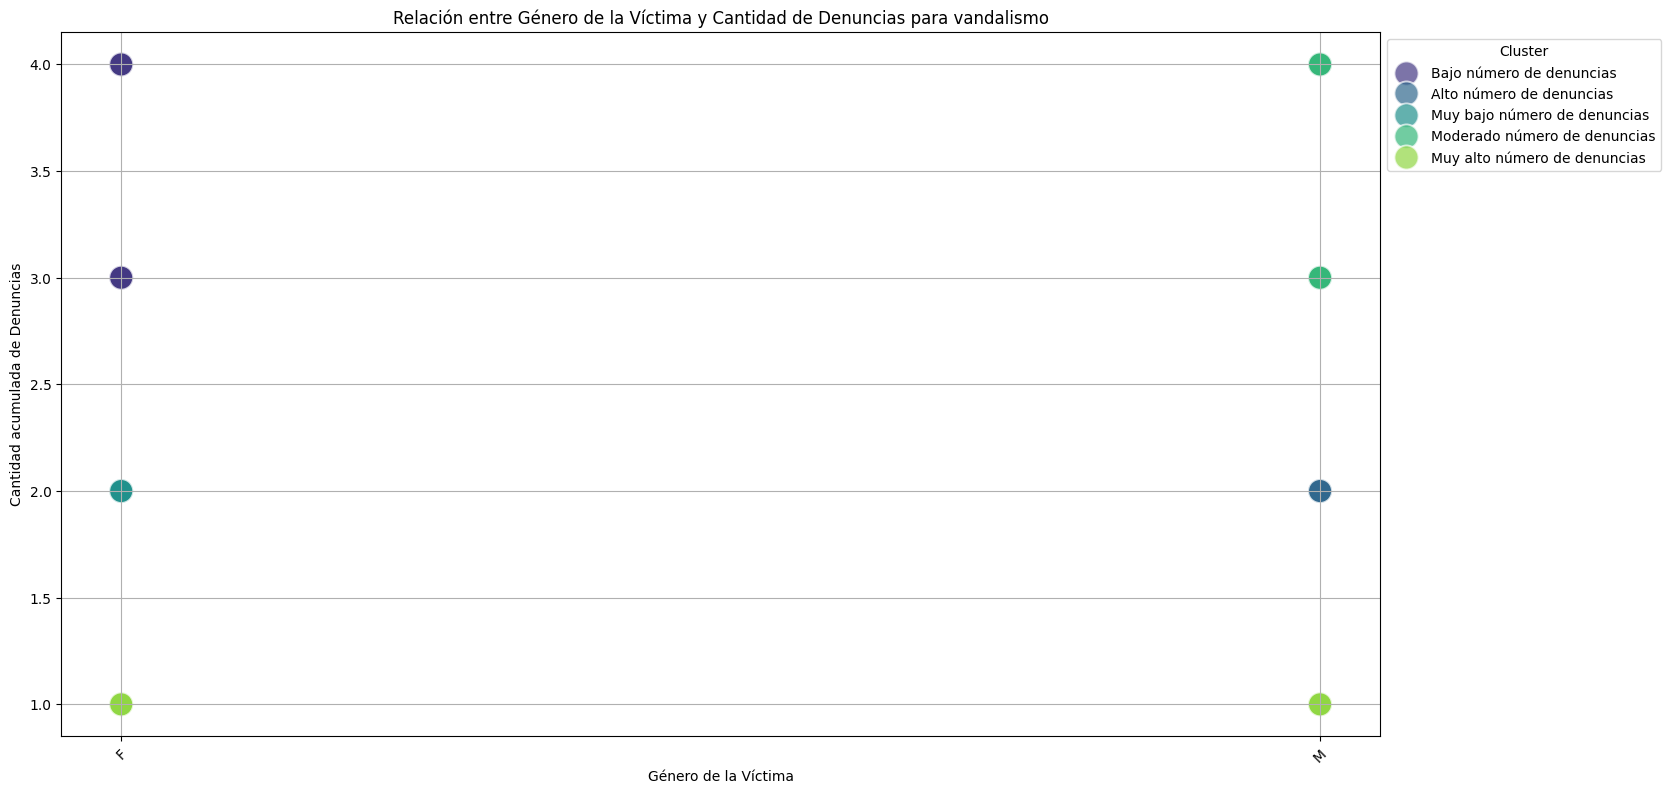

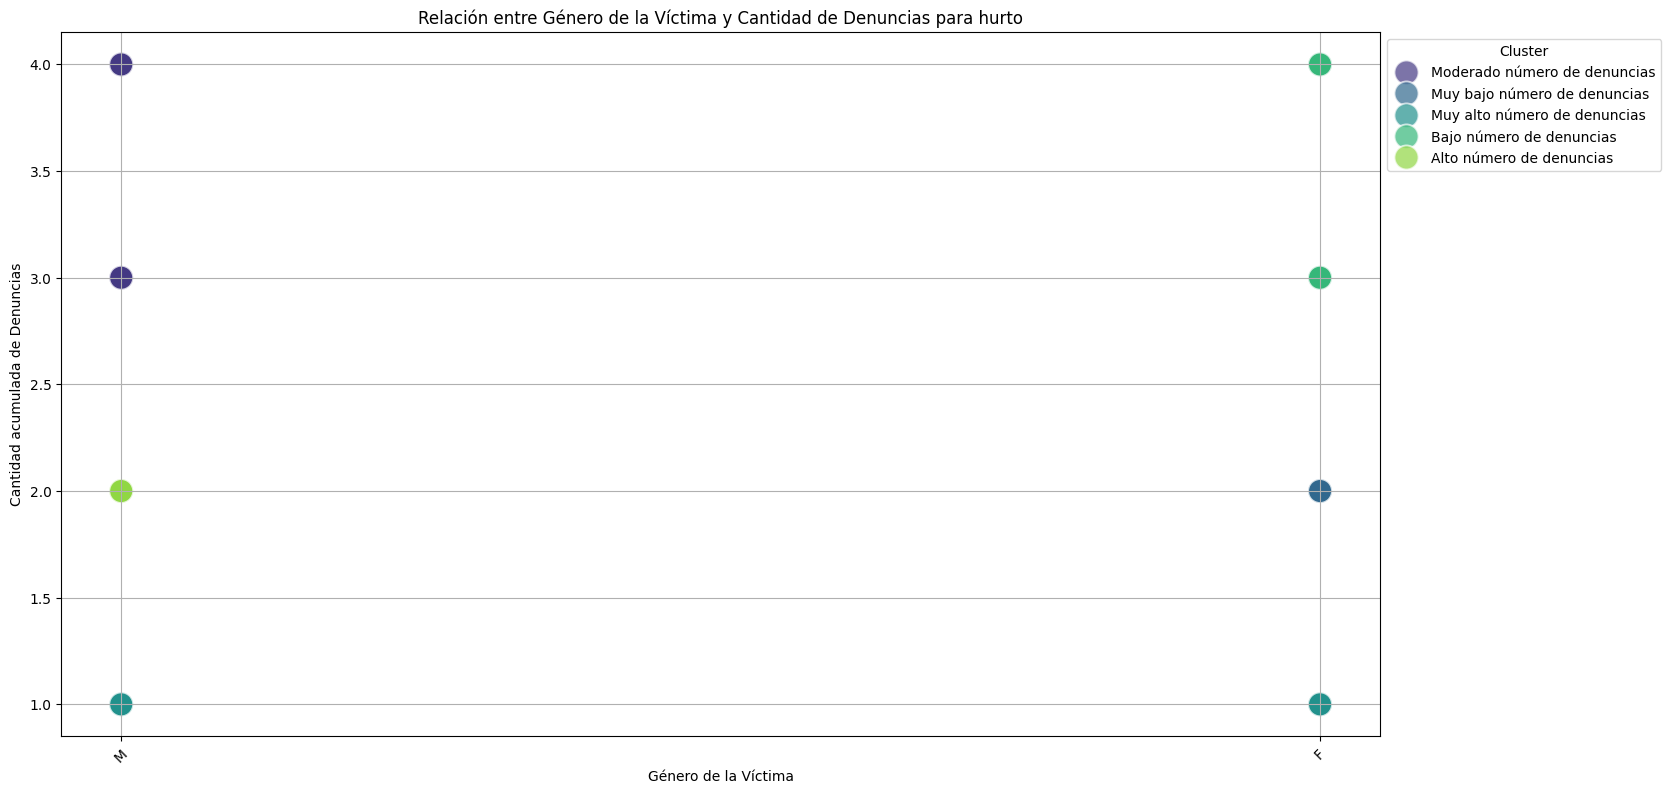

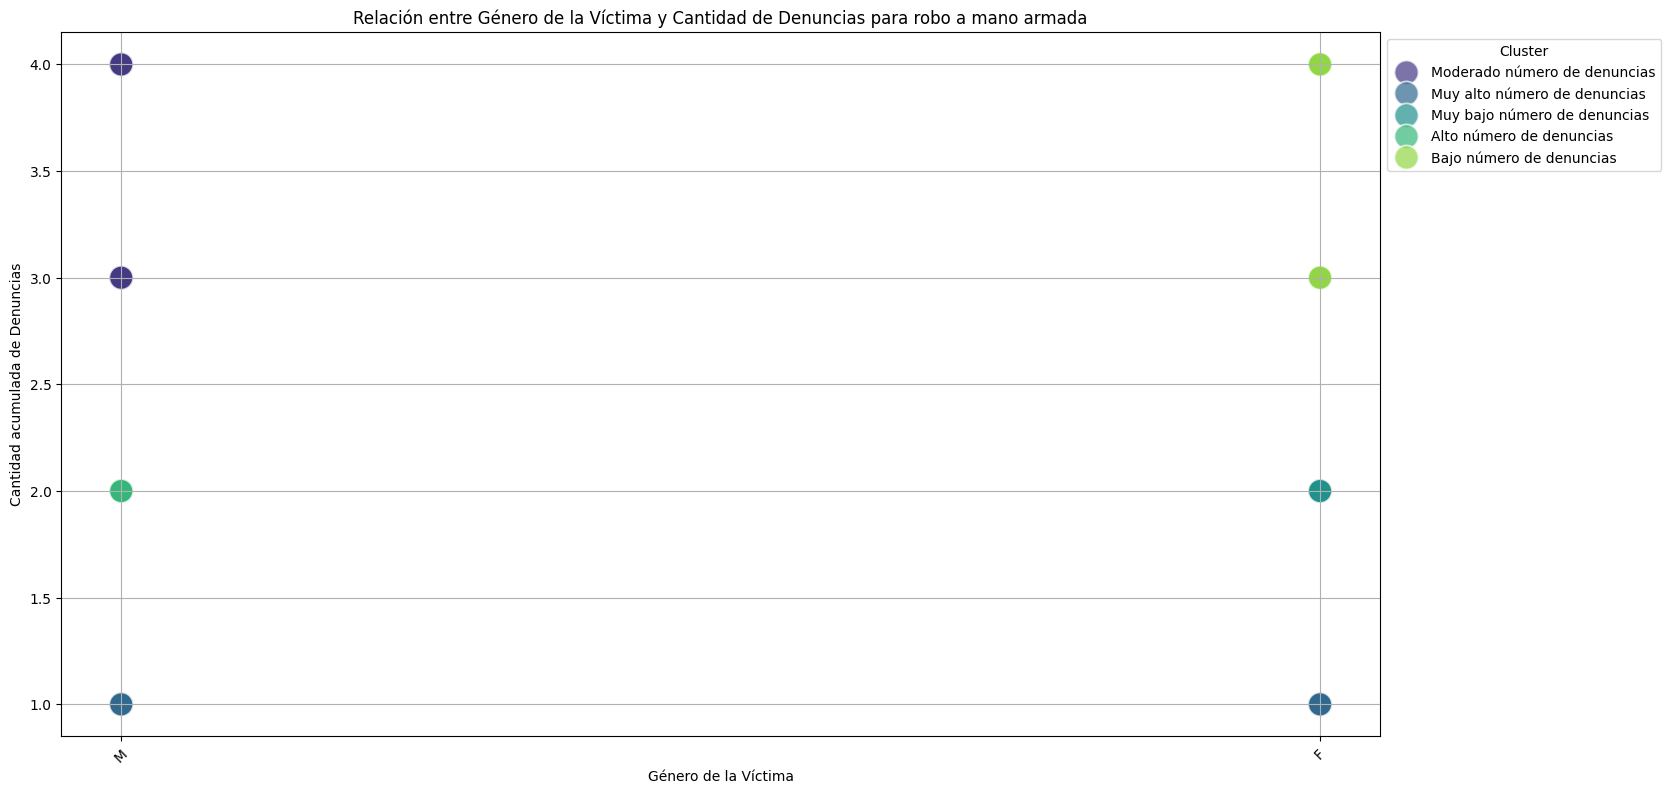

In [24]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[(df['tipo_delito'] != 'N/A') &  
        (df['cantidad_denuncias'] != 0) &
        (df['genero_victima'] != 'N/A')]

le = LabelEncoder()
df['genero_encoded'] = le.fit_transform(df['genero_victima'].astype(str))

X = df[['genero_encoded', 'cantidad_denuncias']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_labels = {
    0: 'Bajo número de denuncias',
    1: 'Alto número de denuncias',
    2: 'Moderado número de denuncias',
    3: 'Muy alto número de denuncias',
    4: 'Muy bajo número de denuncias'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

tipos_de_delito = df['tipo_delito'].dropna().unique()

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(14, 8))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    
    sns.scatterplot(data=df_tipo_delito, x='genero_victima', y='cantidad_denuncias', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Género de la Víctima')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Género de la Víctima y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


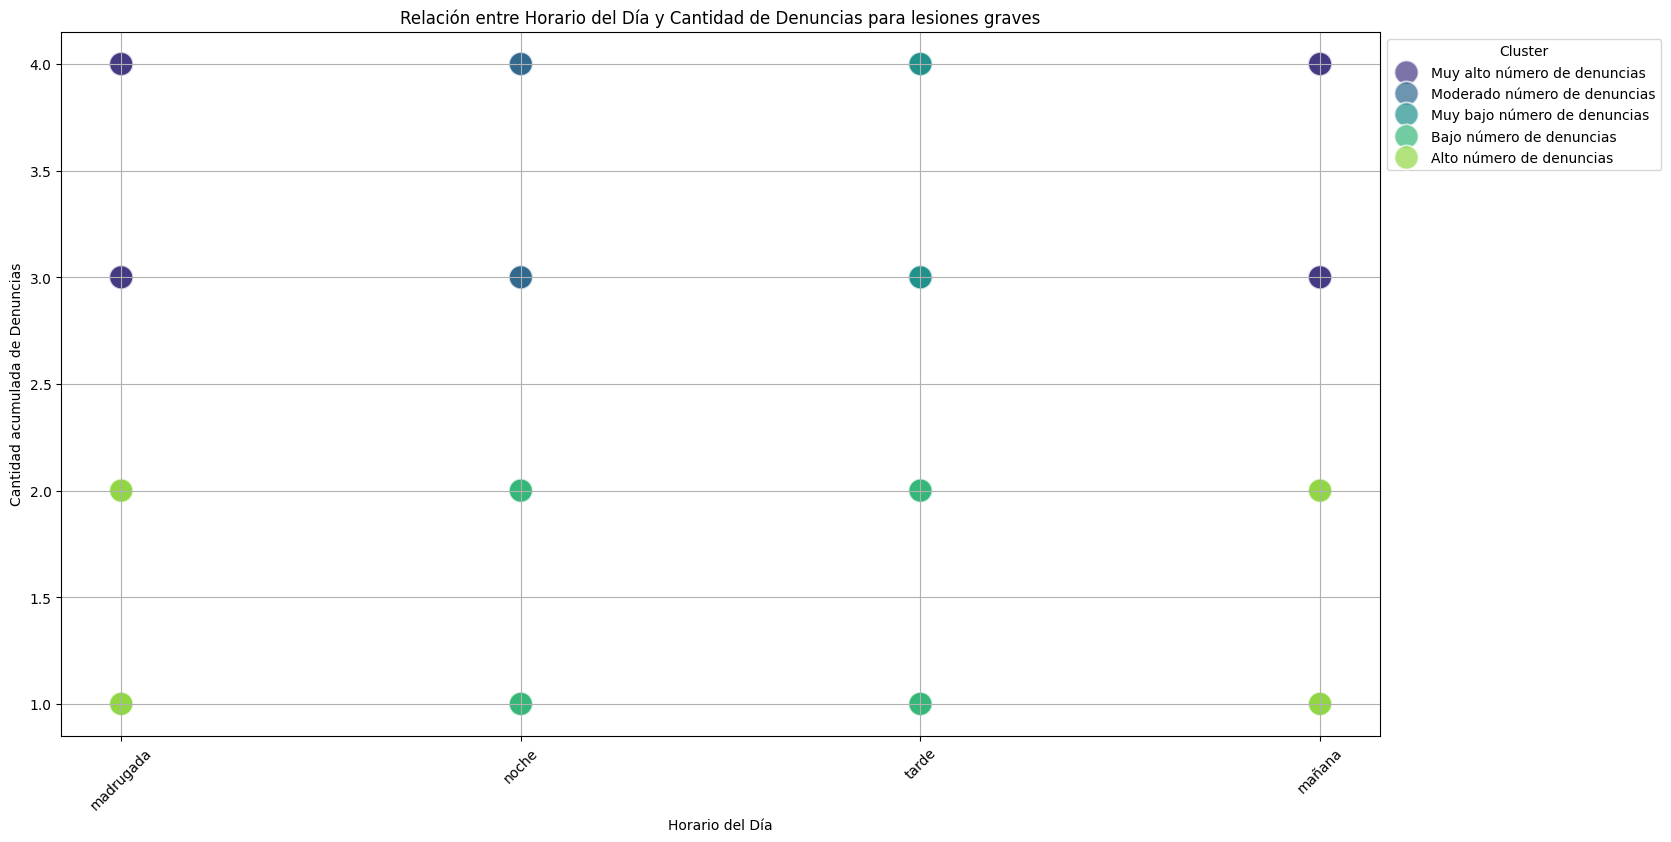

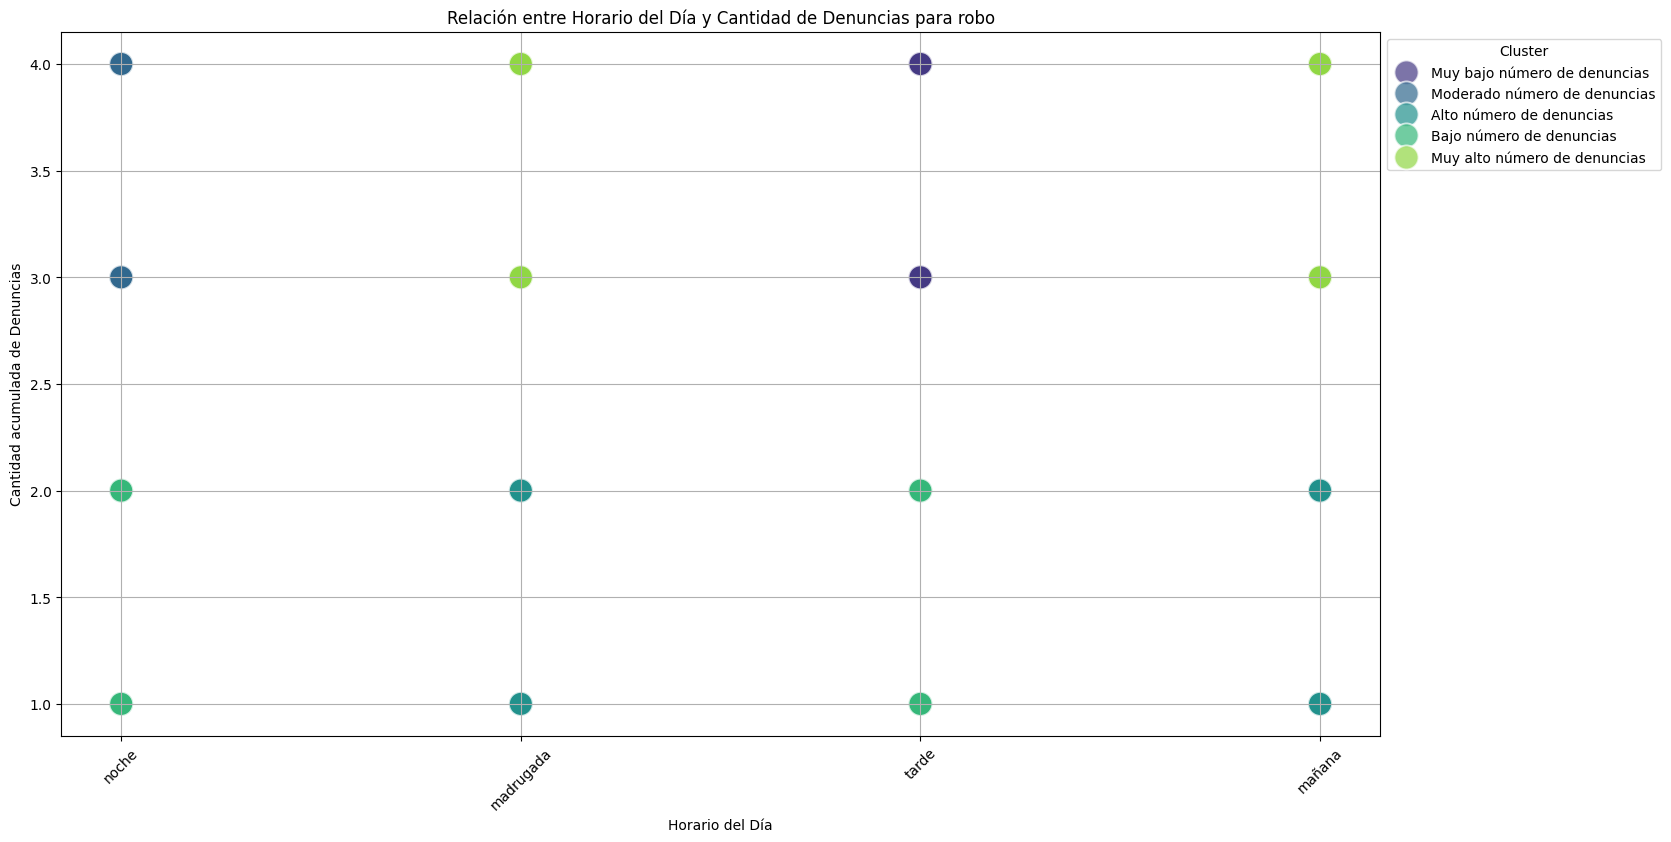

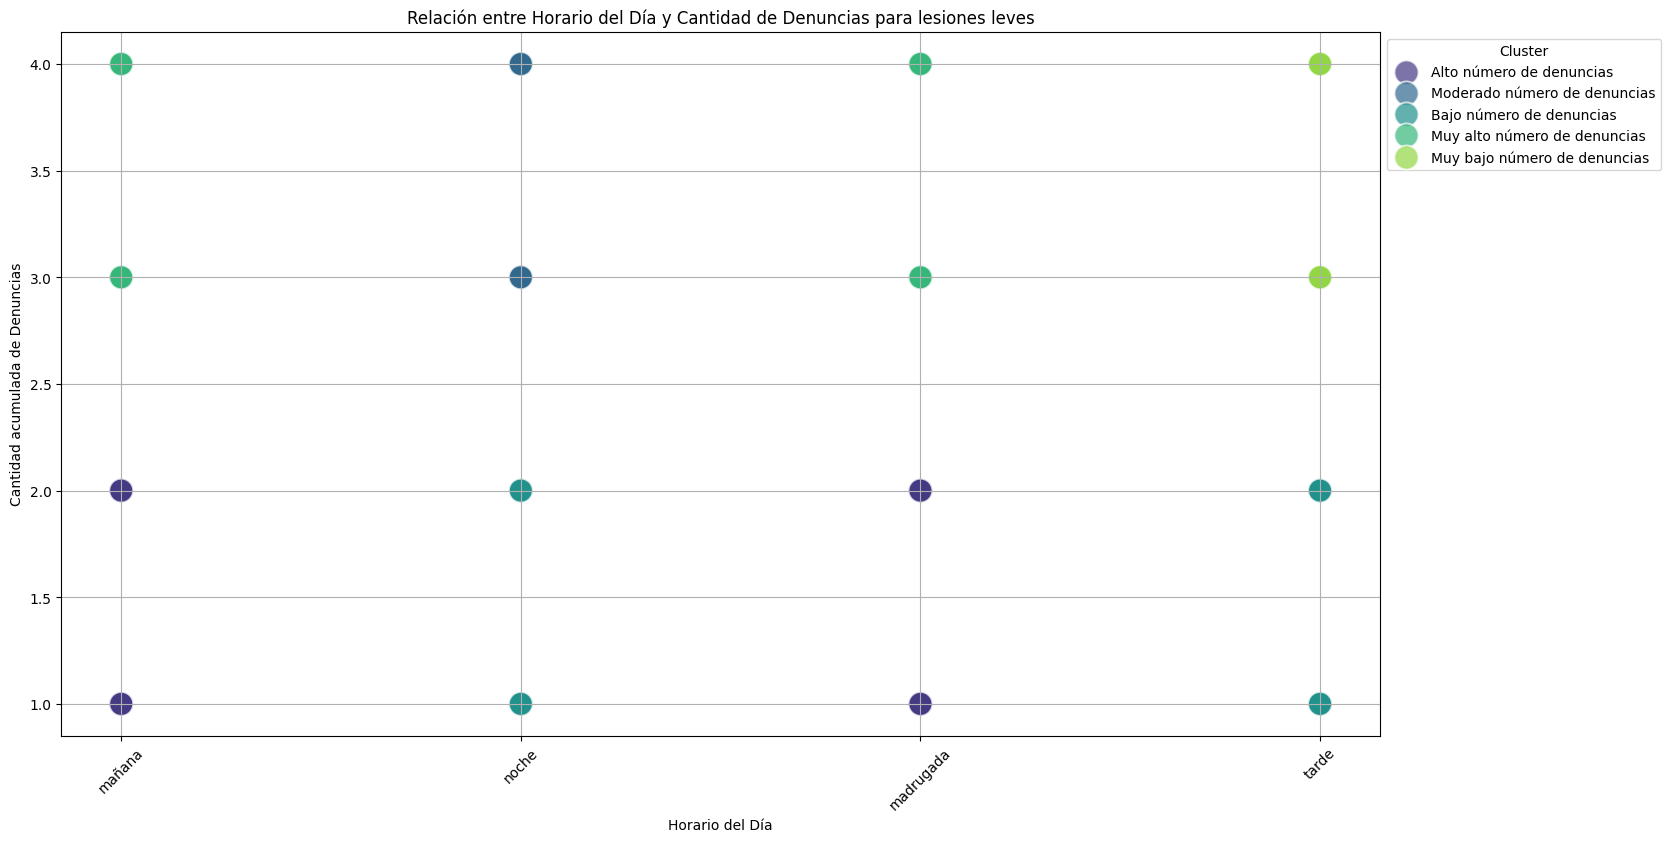

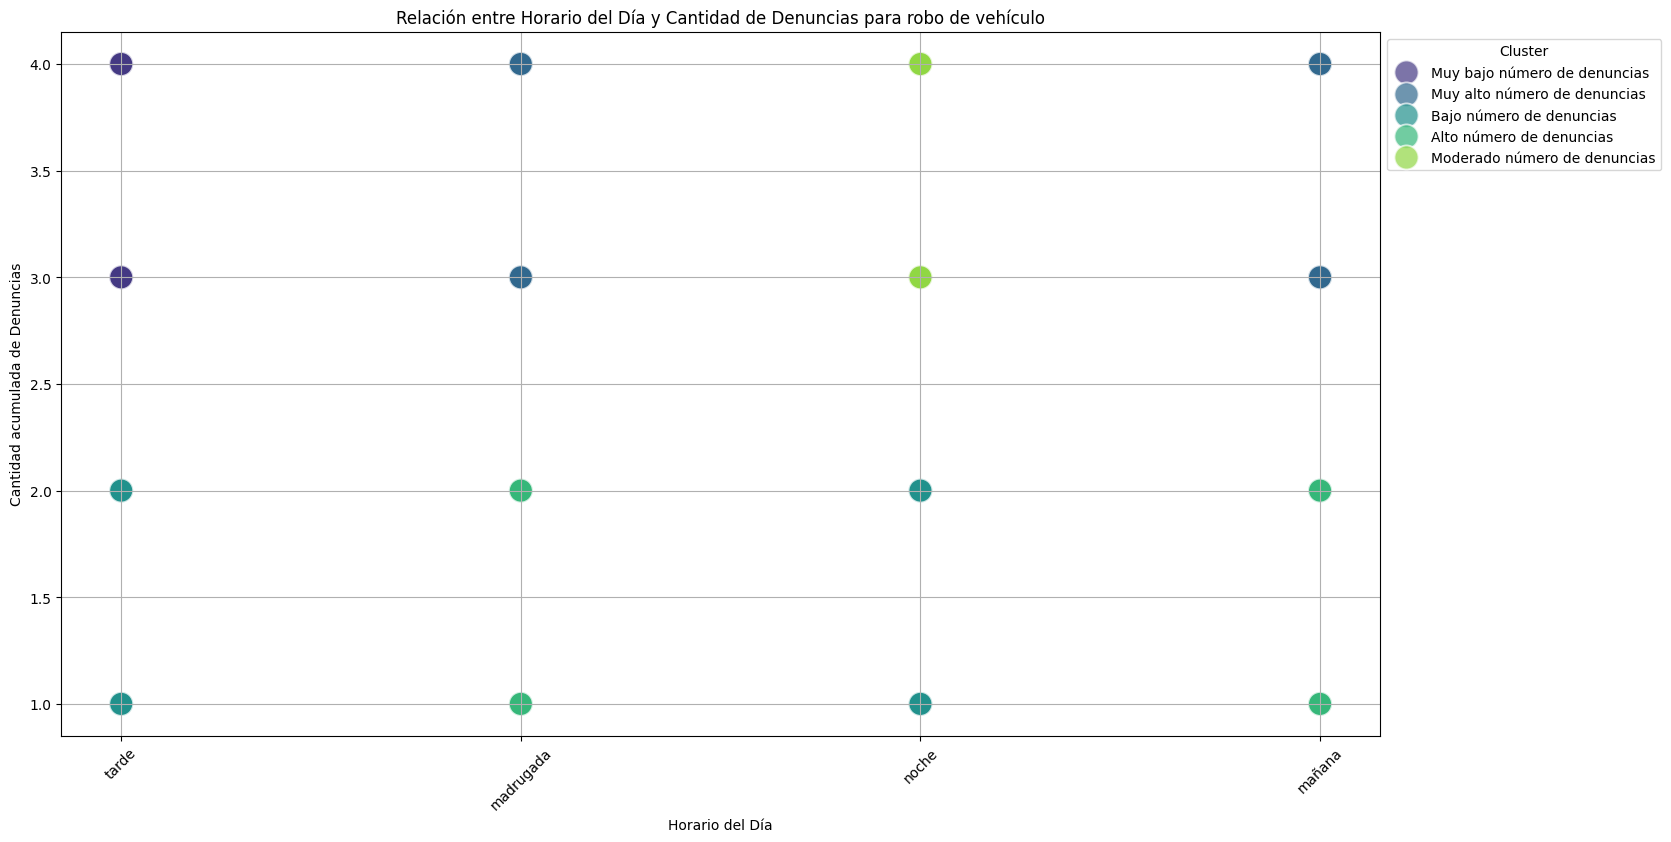

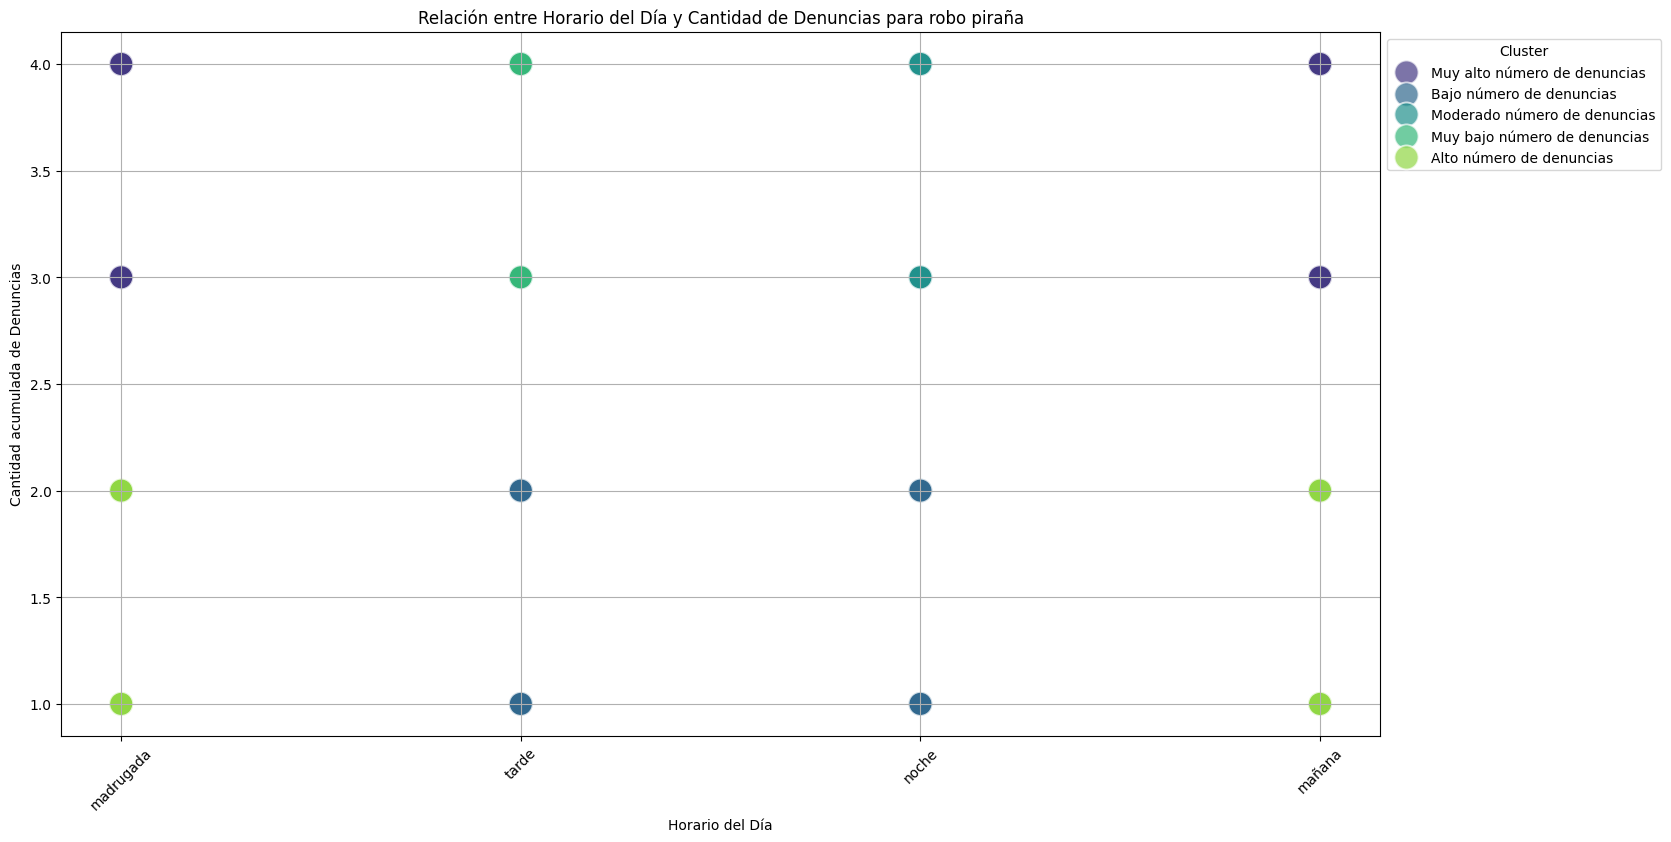

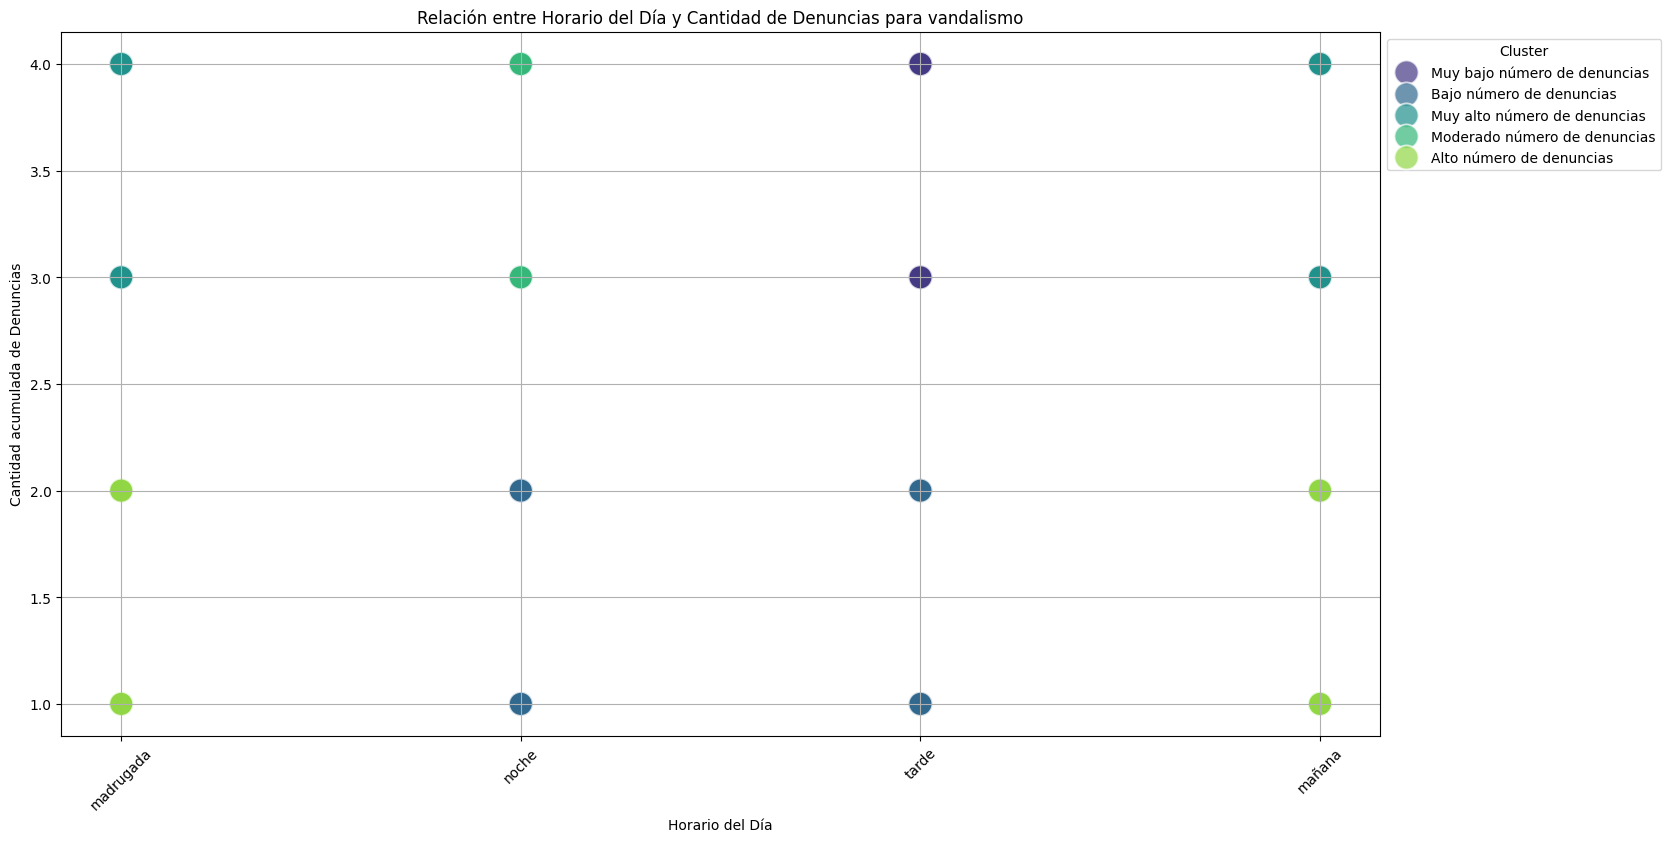

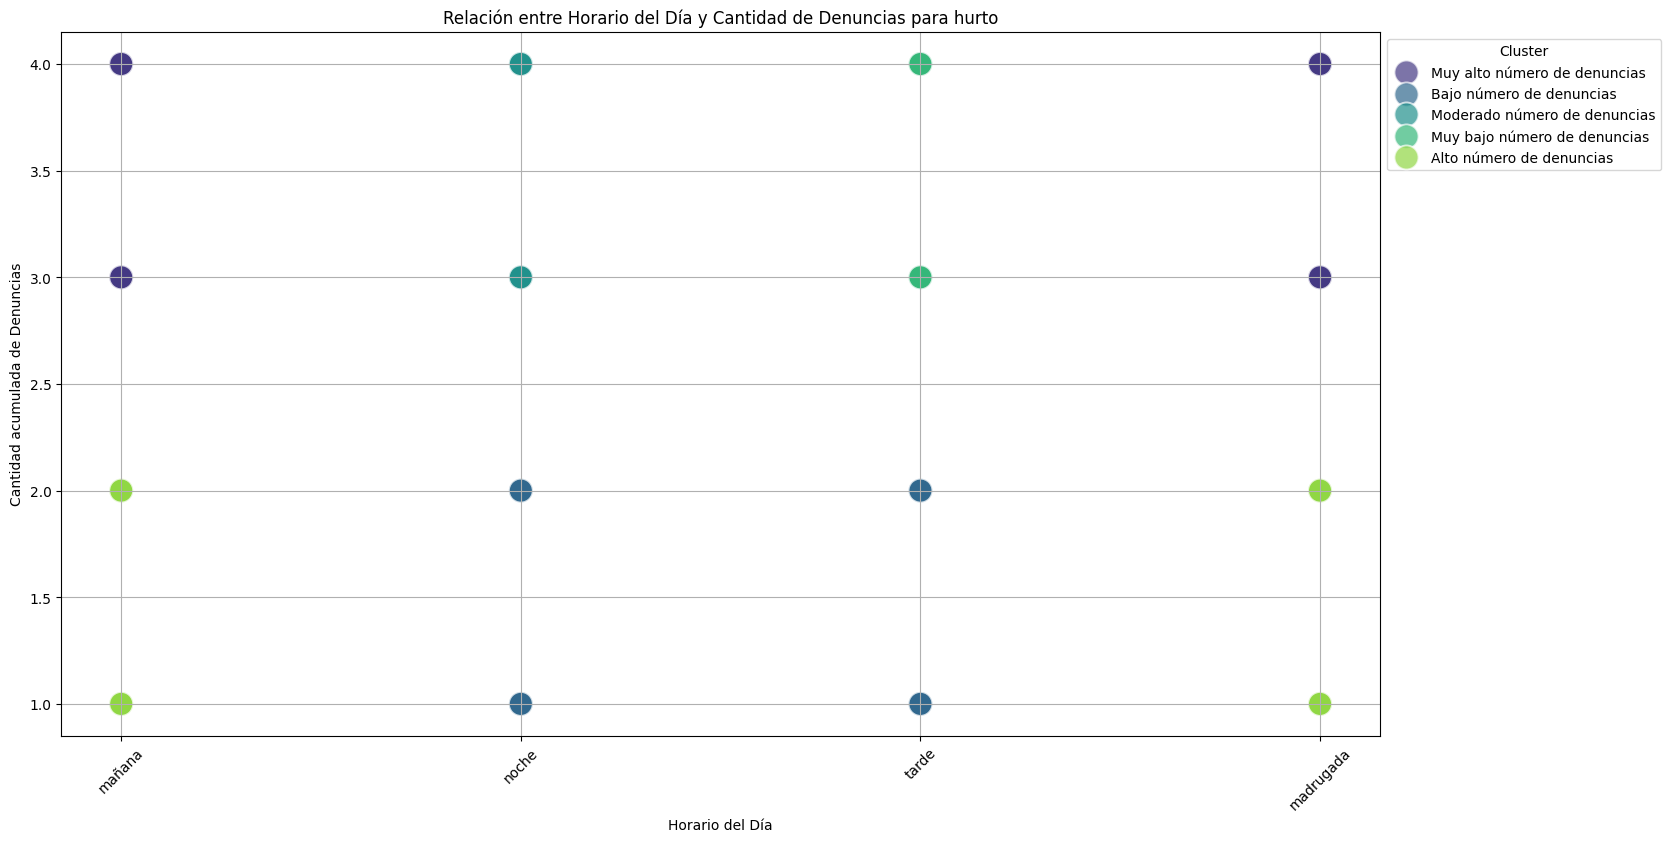

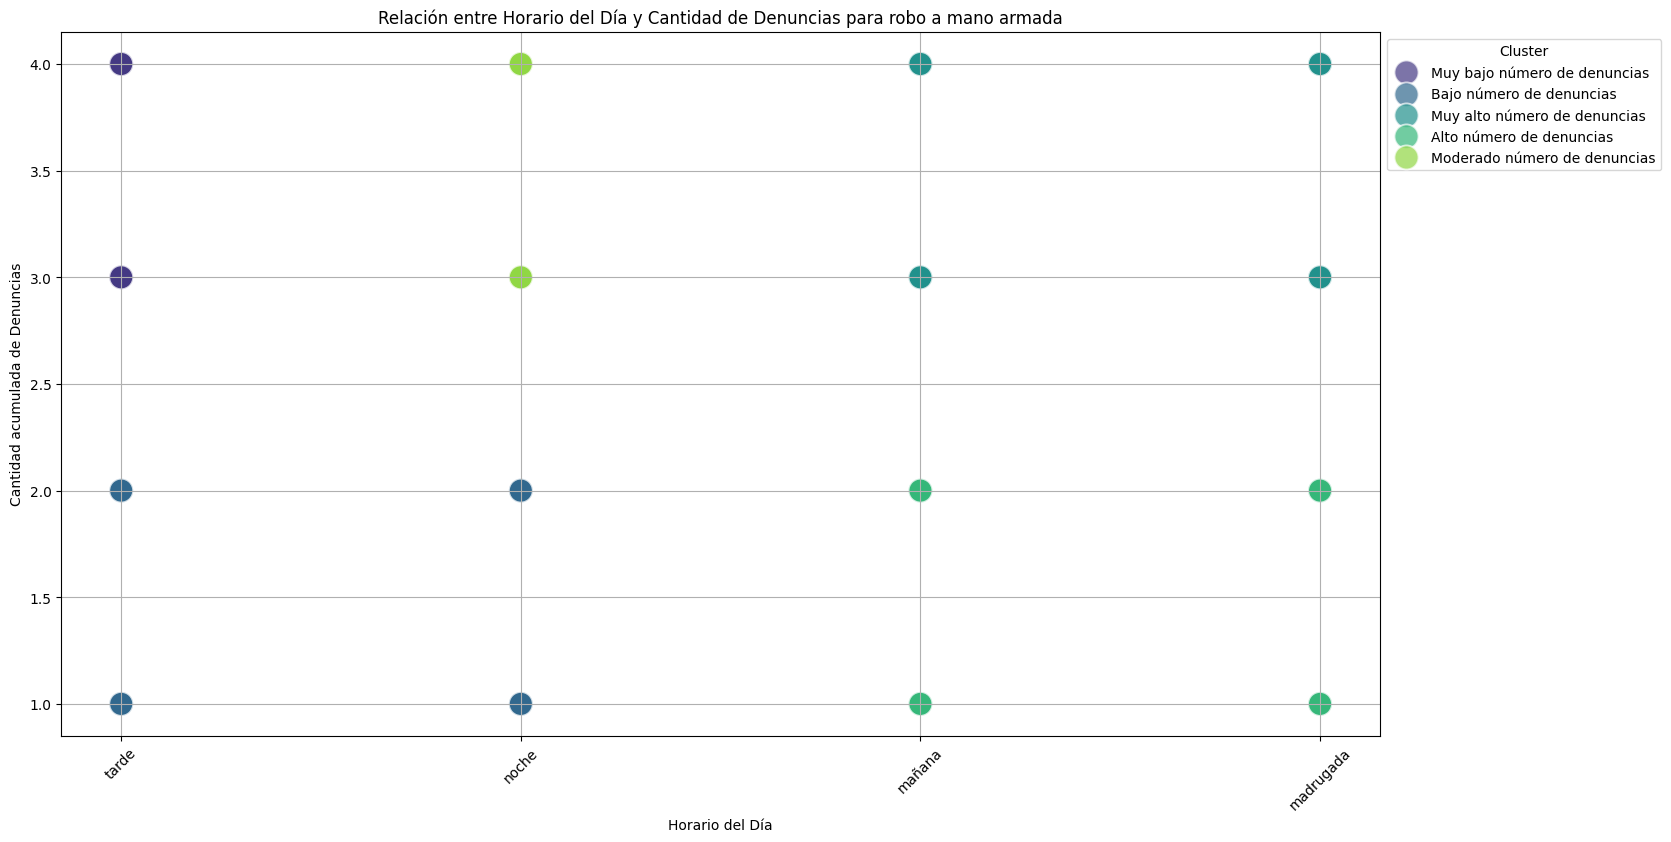

In [25]:
df = pd.read_csv('csv/denuncias_delitos_normalizado.csv')

df = df[(df['tipo_delito'] != 'N/A') & 
        (df['cantidad_denuncias'] != 0) &
        (df['horario_dia'] != 'N/A')]

le = LabelEncoder()
df['horario_encoded'] = le.fit_transform(df['horario_dia'])

X = df[['horario_encoded', 'cantidad_denuncias']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_labels = {
    0: 'Bajo número de denuncias',
    1: 'Alto número de denuncias',
    2: 'Moderado número de denuncias',
    3: 'Muy alto número de denuncias',
    4: 'Muy bajo número de denuncias'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

tipos_de_delito = df['tipo_delito'].dropna().unique()

for tipo_delito in tipos_de_delito:
    plt.figure(figsize=(14, 8))
    df_tipo_delito = df[df['tipo_delito'] == tipo_delito]
    
    sns.scatterplot(data=df_tipo_delito, x='horario_dia', y='cantidad_denuncias', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Horario del Día')
    plt.ylabel('Cantidad acumulada de Denuncias')
    plt.title(f'Relación entre Horario del Día y Cantidad de Denuncias para {tipo_delito}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()